In [1]:
import numpy as np
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import sys
from scipy.integrate import solve_ivp
import cn_utils as cn
import sympy as sp

# Metodos de Runge-Kutta

Nesse capitulo vamos estudar as equações diferenciais ordinarias na seguinte forma

$$\frac{dy}{dx} = f(x,y)$$

Só para relmenbrar, nos capitulos anteriores, na hora de estudar o caso de paraquedista, se familiarizamos com o metodo de Euler. O metodo de Euler, era de seguinte forma geral
<p align="center">
Valor novo = valor anterio + inclinação x tamanho de passo.
</p>

ou em termos matematicos

$$y_{i+1} = y_i + \phi h$$

De acordo com essa equação, a estimativa da inclinação $\phi$ é usada para extrapolar de um
valor antigo $y_i$ para um valor novo $y_{i+1}$ em uma distância $h$. Essa fórmula pode ser aplicada passo a passo para cálculos no futuro e, portanto, para percorrer a trajetória da solução.

<p align="center">
<img src="./images/9-euler.jpg" width=350 height=350 />
</p>

## Metodo de Euler

No calculo um estudamos que a primeira derivada forcene uma estimativa direta da inclinação em $x_i$

$$\phi = f(x_i, y_i)$$

em que $f(x_i, y_i)$ é a equação diferencial calculada em $x_i$ e $y_i$. Essa estimativa pode ser substituída na equação geral

$$y_{i+1} = y_i + f(x_i, y_i)h$$

Essa fórmula é conhecida como método de Euler (ou Euler-Cauchy ou ponto-inclinação). Um novo valor de $y$ é previsto usando a inclinação (igual à primeira derivada no valor original de $x$) para extrapolar linearmente sobre um tamanho de passo $h$.

In [6]:
def euler(func, xi, yi, h=1):
    return yi + func(xi, yi) * h

**Exemplo:**

### Analise de Erro para o Metodo de Euler

## Melhorias para o Metodo de Euler

Uma fonte fundamental de erro no método de Euler é que supomos que a derivada no iní-
cio do intervalo pode ser usada no intervalo todo. Estão disponíveis duas modificações
simples para contornar essas deficiências. Ambas as modificações na verdade pertencem a uma classe maior de técnicas de solução chamadas métodos de Runge-Kutta. Entretanto, como elas têm uma interpretação gráfica muito simples, nós as apresentaremos antes de sua dedução formal como métodos de Runge-Kutta.

### Método de Heun

Um método de melhorar a estimativa da inclinação envolve a determinação de duas derivadas para o intervalo — uma no ponto inicial e outra no ponto final. Então, é feita a média das duas derivadas para obter uma estimativa melhorada da inclinação no intervalo todo. Essa abordagem, chamada de método de Heun, é descrita graficamente na figura abaixo

<p align="center">
<img src="./images/9-heun.jpg" width=350 height=600 />
</p>

Lembre-se de que, no método de Euler, a inclinação no início de um intervalo

$$y'_i = f(x_i, y_i)$$

é usada para extrapolar linearmente para $y_{i+1}$:

$$y^0_{i+1} = y_i + hf(x_i, y_i)$$

No método de Euler padrão, pararíamos nesse ponto. No entanto, no método de Heun, o $y^0_{i+1}$
calculado na equação acima não é a resposta final, mas uma previsão intermediária. É por isso que o distinguimos com o sobrescrito `0`. A equação acima é chamada `equação preditora`. Ela fornece uma estimativa de $^0_{yi+1}$ que permite o cálculo de uma estimativa da
inclinação na extremidade final do intervalo:

$$y'_{i+1} = f(x_{i+1}, y^0_{i+1})$$

Assim, as duas inclinações, as ultimas duas equações acima, podem ser combinadas para
obter uma inclinação média no intervalo:

$$\bar{y}' = \frac{y'_i + y'_{i+1}}{2} = \frac{f(x_i, y_i) + f(x_{i+1}, y^0_{i+1})}{2}$$

Essa inclinação média é então usada para extrapolar linearmente de $y_i$ a $y_{i+l}$ usando o
método de Euler:

$$y_{i+1} = y_i + h\frac{f(x_i, y_i) + f(x_{i+1}, y^0_{i+1})}{2}$$

que é chamada de `equação corretora`.

O método de Heun é uma abordagem do tipo `preditor-corretor`. Todos os métodos de
passo múltiplo que serão discutidos posteriormente são desse tipo.

<p align="center">
<img src="./images/9-heun2.png" width=350 height=350 />
</p>

Como no caso dos métodos iterativos parecidos discutidos nos capitulos anteriores, um critério de parada para a convergência do corretor é fornecido por

$$|\varepsilon_a| = |\frac{y^j_{i+1} - y^{j-1}_{i+1}}{y^j_{i+1}}|$$

#### Exemplo:
Use o método de Heun para integrar $y' = 4e^{0.8x} − 0.5y$ de
$x = 0$ a $x = 4$ com tamanho do passo $h=1$. A condição inicial em $x = 0$ é $y = 2$.


**Resposta:**
A solução analitica é 

$$
y = \frac{4}{1.3} (e^{0.8x} - e^{-0.5x}) + 2e^{-0.5x}
$$

In [70]:
def heun(func, xi, yi, h, n=1):
    y1 = euler(func, xi, yi, h)
    for j in range(n):
        y_prime = func(xi+h, y1)
        y_mid = (y_prime + func(xi, yi))/2
        y_new = yi + y_mid * h
        y1 = y_new
    return y_new

In [102]:
func = lambda x, y: 4*np.exp(0.8 * x) - 0.5 * y

In [73]:
for n in range(1,10):
    print(heun(func, 0, 2, 1, n=n))

6.701081856984936
6.275811392738702
6.38212900880026
6.355549604784871
6.362194455788718
6.360533243037756
6.360948546225496
6.360844720428561
6.360870676877795


### O Método do Ponto Médio (ou do Poligono Melhorado)

Como dá para ver na figura abaixo, ilustra uma outra modificação simples no método de Euler. Chamada de método do ponto médio (ou do polígono melhorado ou de Euler modificado), essa técnica usa o método de Euler para prever um valor de $y$ no ponto médio do intervalo

<p align="center">
<img src="./images/9-mid.png" width=350 height=550 />
</p>

$$y_{i+1/2} = y_i + f(x_i, y_i)\frac{h}{2}$$

Então, esse valor previsto é usado para calcular uma inclinação no ponto médio:

$$y_{i+1} = y_i + f(x_{i+1/2}, y_{i+1/2})h$$

Observe que, como $y_{i+1}$ não aparece em ambos os lados, o corretor, equação acima, não
pode ser aplicado iterativamente para melhorar a solução.

Esse metodo, pode ser ligado com as formulas de integração de Newton-Cotes, a versão mais simples, a qual é chamada de método do ponto médio.

O método do ponto médio é superior ao método de Euler porque utiliza uma estimativa da inclinação no ponto médio do intervalo de previsão. Lembre-se, de nossa discussão de derivação numérica, de que diferenças divididas finitas centradas são aproximações melhores das derivadas do que as versões tanto progressiva quanto regressiva. No mesmo sentido, uma aproximação centrada tem um erro de truncamento local de $\mathcal{O}(h^2)$ em comparação com a aproximação progressiva do método de Euler, o qual tem um erro de $\mathcal{O}(h)$. Conseqüentemente, os erros local e global do método do ponto médio são $\mathcal{O}(h^3)$ e $\mathcal{O}(h^2)$, respectivamente.

In [101]:
def mid_point(func, xi, yi, h):
    yi12 = yi + func(xi, yi)*(h/2)
    return yi + func(xi + (h/2), yi12) * h

In [4]:
mid_point(func, 0, 2, 1)

6.217298790565081

**Comparar os três metodos**

In [103]:
def compare(func, x0, y0, xf, h, methods= 'all'):
    num_steps = int((xf - x0)/h)
    xs = [x0 + n*h for n in range(num_steps+1)]

    if methods == 'all':
        ys = [[y0]*3]
        for i in range(1, num_steps+1):
            y_new = []
            y_new.append(euler(func, xs[i-1], ys[-1][-1], h))
            y_new.append(mid_point(func, xs[i-1], ys[-1][-1], h))
            y_new.append(heun(func, xs[i-1], ys[-1][-1], h, n))
            ys.append(y_new)
        
        ys_final = []
        methods = ['euler', 'mid_point', 'heun']
        for i in range(len(ys[0])):
            y_new = []
            for item in ys:
                y_new.append(item[i])
            y_new.append(methods[i])
            ys_final.append(y_new)


        return xs, ys_final

In [104]:
res = compare(func, 0, 2, 4, 1)

In [105]:
res[1]

[[2, 5.0, 12.25270464246234, 27.972020666529602, 62.69232997099879, 'euler'],
 [2,
  6.217298790565081,
  15.243102923069308,
  34.803055682513914,
  78.00494126428708,
  'mid_point'],
 [2,
  6.701081856984936,
  16.31978193789828,
  37.199248896864745,
  83.33776733540077,
  'heun']]

O resultado analitico da EDO é o seguinte

In [106]:
y_analitic = lambda x: (4/1.3) * (np.exp(0.8*x) - np.exp(-0.5*x)) + 2 * np.exp(-0.5*x)

In [107]:
fig = go.Figure()

for y in res[1]:
    fig.add_scatter(x=res[0], y=y[:-1], name=y[-1] )
y_exact = list(map(y_analitic, res[0]))
fig.add_scatter(x=res[0], y=y_exact, name='analitic')
fig.show()

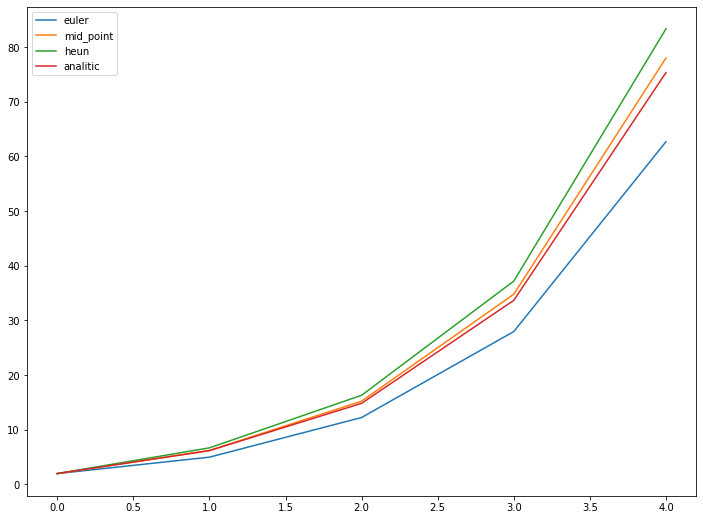

In [108]:
plt.figure(figsize=(12,9))

for y in res[1]:
    plt.plot(res[0], y[:-1], label=y[-1] )

y_exact = list(map(y_analitic, res[0]))
plt.plot(res[0], y_exact, label='analitic')
plt.legend()
plt.show()

Reduzindo o tamanho dos passos

In [109]:
res = compare(func, 0, 2, 4, 0.5)

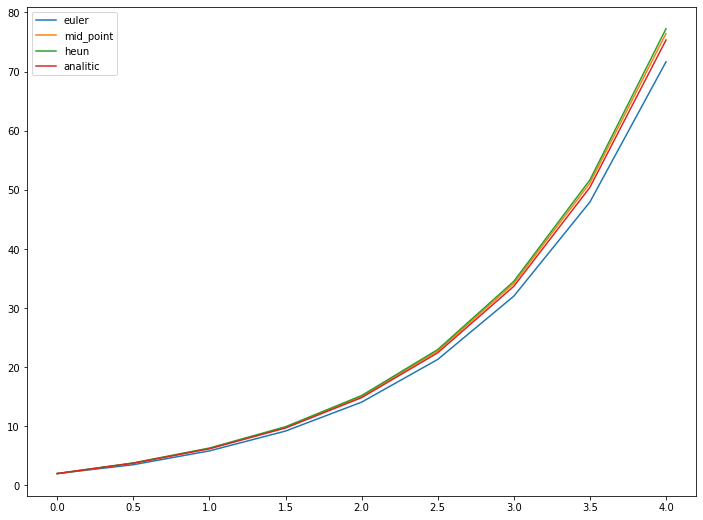

In [110]:
plt.figure(figsize=(12,9))

for y in res[1]:
    plt.plot(res[0], y[:-1], label=y[-1] )

y_exact = list(map(y_analitic, res[0]))
plt.plot(res[0], y_exact, label='analitic')
plt.legend()
plt.show()

## Expansão de Taylor da ordem $n$

A expansão de Taylor é uma série infinita que representa uma função como uma soma infinita de termos calculados a partir das derivadas da função em um ponto. A expansão de Taylor de uma função $f(x)$ em torno de um ponto $x=a$ é dada por

$$f(x + h) = f(a) + f'(a)h + \frac{f''(a)}{2!}h^2 + \frac{f'''(a)}{3!}h^3 + \cdots$$

onde $f'(a)$, $f''(a)$, $f'''(a)$, $\cdots$ são as derivadas da função $f(x)$ em $x=a$.

Usando a expansão de Taylor, podemos derivar métodos de Runge-Kutta de ordem superior. O método de Euler é um método de Runge-Kutta de primeira ordem. O método de Heun é um método de Runge-Kutta de segunda ordem. O método do ponto médio é um método de Runge-Kutta de segunda ordem. O método de Runge-Kutta de quarta ordem é um método de Runge-Kutta de quarta ordem.

A gente pode usar a expansão de Taylor para resolver uma EDO com uma precisão maior usando termos de ordem superior. A expansão de Taylor até a ordem 1 resulta no método de Euler. A expansão de Taylor até a ordem 2 resulta no método de Heun. A expansão de Taylor até a ordem 2 resulta no método do ponto médio. A expansão de Taylor até a ordem 4 resulta no método de Runge-Kutta de quarta ordem. 

Vamos usar a expansão de Taylor para resolver a EDO $y' = f(x, y)$.

**Exemplo:**

Usando a expansão de Taylor até a ordem 2, calcula o valor $y(1)$ tendo a EDO $y' = 3 x^2$ com a condição inicial $y(1) = 1$.

**Resposta:**

A expansão de Taylor até a ordem 2 é dada por

$$y(x + h) = y(x) + y'(x)h + \frac{y''(x)}{2!}h^2$$

Substituindo $y' = 3 x^2$ na equação acima, temos

$$y(x + h) = y(x) + 3 x^2 h + \frac{y''(x)}{2!}h^2$$

A derivada de $y' = 3 x^2$ é $y'' = 6 x$. Substituindo $y'' = 6 x$ na equação acima, temos

$$y(x + h) = y(x) + 3 x^2 h + \frac{6 x}{2!}h^2$$

Substituindo $y(1) = 1$ e $h = 1$, temos

$$y(2) = 1 + 3 \times 1^2 \times 1 + \frac{6 \times 1}{2!}1^2 = 1 + 3 + 3 = 7$$

Portanto, o valor de $y(2)$ é 7.

Podemos escrever um programa em Python para resolver este problema.


In [1]:
def taylor2(f, df, a, b, y0, N):
    h = (b-a)/N
    t = np.linspace(a, b, N+1)
    y = np.zeros(N+1)
    y[0] = y0
    for i in range(1, N+1):
        y[i] = y[i-1] + h*f(t[i-1], y[i-1]) + (h**2/2)*df(t[i-1], y[i-1])
    return t, y

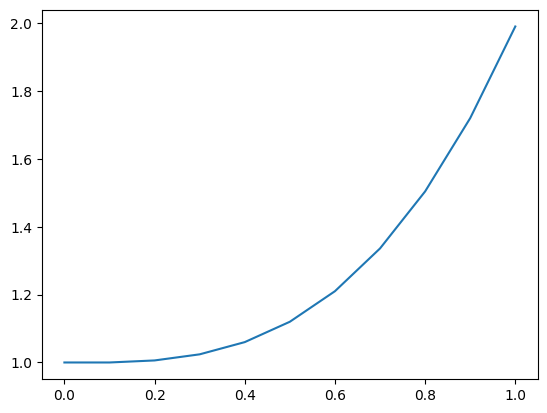

In [8]:
func = lambda x, y: 3*x **2
dfunc = lambda x, y: 6*x

t, y = taylor2(func, dfunc, 0, 1, 1, 10)

plt.plot(t, y)

**Exemplo:**
Usando a expansão de Taylor até a ordem 2, calcula o valor $y(1)$ tendo a EDO $y' = 3 x^2 + y^2$ com a condição inicial $y(1) = 1$.

**Resposta:**

A expansão de Taylor até a ordem 2 é dada por

$$y(x + h) = y(x) + y'(x)h + \frac{y''(x)}{2!}h^2$$

Substituindo $y' = 3 x^2 + y^2$ na equação acima, temos

$$y(x + h) = y(x) + (3 x^2 + y^2) h + \frac{y''(x)}{2!}h^2$$

A derivada de $y' = 3 x^2 + y^2$ é $y'' = 6 x + 2 y y'$. Substituindo $y'' = 6 x + 2 y y'$ na equação acima, temos

$$y(x + h) = y(x) + (3 x^2 + y^2) h + \frac{6 x + 2 y y'}{2!}h^2$$

Substituindo $y'$ na equação acima, temos

$$y(x + h) = y(x) + (3 x^2 + y^2) h + \frac{6 x + 2 y (3 x^2 + y^2)}{2!}h^2$$

Substituindo $y(1) = 1$ e $h = 1$, temos

$$y(2) = 1 + (3 \times 1^2 + 1^2) \times 1 + \frac{6 \times 1 + 2 \times 1 (3 \times 1^2 + 1^2)}{2!}1^2 = 1 + 4 + 8 = 13$$

Portanto, o valor de $y(2)$ é 13.



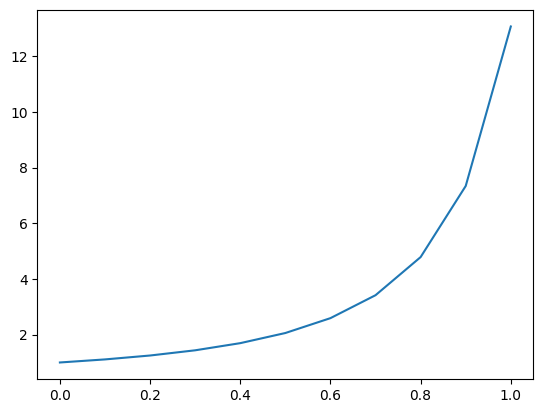

In [9]:
func = lambda x, y: 3*x **2 + y ** 2
dfunc = lambda x, y: 6*x + 2*y

t, y = taylor2(func, dfunc, 0, 1, 1, 10)

plt.plot(t, y)



## Métodos de Runge-Kutta

Os métodos de `Runge-Kutta (RK)` alcançam a acurácia de uma abordagem por série de Taylor sem exigir cálculos de derivadas de ordem superior. Há muitas variações, mas todas podem ser postas na forma geral

$$y_{i+1} = y_i + \phi(x_i, y_i)h$$

em que $\phi(x_i, y_i, h)$ é chamada função incremento, a qual pode ser interpretada como representativa da inclinação em um intervalo. A função incremento pode ser escrita na
forma geral

$$\phi = a_1k_1 + a_2 k_2 +...+ a_n k_n $$

em que os $a$’s são constantes e os $k$’s são

\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + p_1 h, y_i + q_{11}k_1 h)\\
k_3 &= f(x_i + p_2 h, y_i + q_{21}k_1 h + q_{22}k_2 h)\\
.\\
.\\
.\\
k_n &= f(x_i + p_{n-1} h, y_i + q_{n-1,1}k_1 h + q_{n-1,2}k_2 h + ... + q_{n-1,n-1}k_{n-1} h)
\end{align*}

em que os $p$’s e os $q$’s são constantes. Observe que os $k$’s são relações de recorrência. Isto é, $k_1$ aparece na equação para $k_2$, o qual aparece na equação para $k_3$, e assim por diante. Como cada $k$ é um cálculo da função, essa recorrência torna os métodos RK eficientes
para cálculos computacionais.

Vários tipos de métodos de Runge-Kutta podem ser deduzidos usando-se um número diferente de termos na função incremento, conforme especificado por $n$. Observe que o método RK de primeira ordem com $n = 1$ é, na realidade, o método de Euler. Uma vez que n seja escolhido, os valores para os $a$’s, os $p$’s e os $q$’s são calculados igualando-se a equação principal a termos da expansão em série de Taylor. Logo, pelo menos para as versões de ordem mais baixa, o número de termos, $n$, usualmente representa a ordem da abordagem. Por exemplo, na próxima seção, os métodos RK de segunda ordem usam uma função incremento com dois termos $(n = 2)$. Tais métodos de segunda ordem serão exatos se a solução da equação diferencial for quadrática. Além disso, como os termos com $h^3$ e com grau mais alto foram desprezados durante a dedução,
o erro de truncamento local é $\mathcal{O}(h^3)$ e o erro global é $\mathcal{O}(h^2)$. Nas seções subsequentes, serão desenvolvidos os métodos RK de terceira e quarta ordens ($n = 3$ e $4$, respectivamente), casos nos quais os erros de truncamento globais são $\mathcal{O}(h^3)$ e $\mathcal{O}(h^4)$, respectivamente.

### Métodos de Runge-Kutta de Segunda Ordem

A versão de segunda ordem da equação geral do método de RK é

$$y_{i+1} = y_i + (a_1k_1 + a_2k_2)h$$

em que

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + p_1 h, y_i + q_{11}k_1 h) 
\end{align}

Os valores $a_1$, $a_2$, $p_1$ e $q_{11}$ são calculados igualando-se a equação acima à expansão em série de Taylor até os termos de $2^o$ grau.

<p align="center">
<img src="./images/9-rk2.png" width=850 height=800 />
</p>

Fazendo isso, deduzimos três equações para calcular as quatro constantes desconhecidas. As três equações são

\begin{align}
a_1 + a_2 &= 1\\
a_2 p_1 &= \frac{1}{2}\\
a_2 q_{11} &= \frac{1}{2}
\end{align}

Como temos três equações com quatro incógnitas, devemos escolher um valor para
uma das incógnitas para determinar as outras três. Suponha que especifiquemos um valor
para $a_2$. Então, as equações acima podem ser resolvidas simultaneamente por

\begin{align*}
a_1 &= 1- a_2 \\
p_1 &= q_{11} = \frac{1}{2a_2}
\end{align*}

Como podemos escolher um número infinito de valores para $a_2$, existe um número
infinito de métodos RK de segunda ordem. Cada versão forneceria exatamente o mesmo
resultado se a solução da EDO fosse quadrática, linear ou constante. Entretanto, elas
fornecem resultados diferentes quando (como é o caso típico) a solução é mais complicada. Apresentamos três das versões usadas mais freqüentemente e preferidas:

#### Método de Heun com um Único Corretor $(a_2 = \frac{1}{2})$

Se for suposto que $a_2 = \frac{1}{2}$, as equações podem ser resolvidas por $a_1 = 1/2$ e $p_1 = q_{11} = 1$. Esses parâmetros, quando substituídos na equação principal, fornecem

$$y_{i+1} = y_i + (\frac{1}{2}k_1 + \frac{1}{2}k_2)h$$

em que

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + h, y_i + k_1 h) 
\end{align}

Observe que $k_1$ é a inclinação no início do intervalo e $k_2$ é a inclinação no final do intervalo. Consequentemente, esse método de segunda ordem de Runge-Kutta é, na realidade,
a técnica de Heun sem iteração!

#### O Método do Ponto Médio $(a_2 = 1)$

Se for suposto que $a_2$ é 1, então $a_1 = 0, p_1 =
q_{11} = \frac{1}{2}$, e a equação principal se torna

$$y_{i+1} = y_i + k_2 h$$

em que 

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2} k_1 h) 
\end{align}

Esse é o método do ponto médio.

#### Método de Ralston ($a_2 = \frac{2}{3}$)

Ralston (1962) e Ralston e Rabinowitz (1978) determinaram que a escolha $a_2 = \frac{2}{3}$ fornece um limitante mínimo para o erro de truncamento para os algoritmos RK de segunda ordem. Para essa versão, $a_1 = \frac{1}{3}$ e $p_1 = q_{11} = \frac{3}{4}$, e obtém-se

$$y_{i+1} = y_i + (\frac{1}{3} k_1 + \frac{2}{3} k_2)h$$

em que 

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{3}{4} h, y_i + \frac{3}{4} k_1 h) 
\end{align}

#### **Exemplo:**
Use o método do ponto médio e o método
de Ralston para integrar numericamente a equação

$$f(x,y) = -2x^3 + 12 x^2 - 20x + 8.5$$

de $x = 0$ a $x = 4$ usando um tamanho de passo de $0.5$. A condição inicial em $x = 0$ é
$y = 1$. Compare os resultados com os valores obtidos usando um outro algoritmo RK de
segunda ordem, isto é, o método de Heun sem iteração do corretor. Tambem com o resultado analitico e o metodo de Euler.

### Métodos de Runge-Kutta de Terceira Ordem

Para $n = 3$, a dedução é parecida com a dos métodos de segunda ordem. O resultado dessa
dedução é um conjunto de seis equações com oito incógnitas. Portanto, devem ser especificados valores *a priori* para duas das incógnitas para determinar os parâmetros restantes. Uma versão comum que resulta é

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 4k_2 + k3)h
$$

em que

\begin{align}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_1 h)\\
k_3 &= f(x_i, y_i - k_1h + 2k_2 h)
\end{align}

Observe que, se a derivada for uma função apenas de $x$, o método de terceira ordem
se reduz à regra `1/3 de Simpson`. Ralston (1962) e Ralston e Rabinowitz (1978) desenvolveram uma versão alternativa que fornece um limitante mínimo para o erro de truncamento. De qualquer modo, os métodos RK de terceira ordem têm erros local e global de $\mathcal{O}(h^4)$ e $\mathcal{O}(h^3)$, respectivamente, e fornecem resultados exatos se a solução for uma função
cúbica. Tratando-se de polinômios, a equação acima também será exata quando a equação diferencial for uma função cúbica e a solução for de quarto grau, porque a regra 1/3 de Simpson fornece estimativas exatas da integral para funções cúbicas.

### Métodos de Runge-Kutta de Quarta Ordem

Os métodos RK mais populares são os de quarta ordem. Como no caso das abordagens de
segunda ordem, existe um número infinito de versões. A seguinte é a forma mais comumente usada e, assim, a chamamos `método RK de quarta ordem clássico`:

$$
y_{i+1} = y_i + \frac{1}{6}(k_1 + 2k_2 + 2k_3 + k_4)h
$$

em que

\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_1 h)\\
k_3 &= f(x_i + \frac{1}{2} h, y_i + \frac{1}{2}k_2 h)\\
k_4 &= f(x_i+h, y_i + k_3h)
\end{align*}

Observe que para EDOs que são uma função apenas de $x$, o método RK de quarta
ordem clássico é parecido com a `regra 1/3 de Simpson`. Além disso, o método RK de
quarta ordem é parecido com a abordagem de Heun no fato que são desenvolvidas
múltiplas estimativas da inclinação para se chegar a uma inclinação média melhorada
no intervalo. Como descrito na figura abaixo, cada um dos $k$’s representa uma inclinação.
Então, a equação acima representa uma média ponderada delas para chegar a uma
inclinação melhorada.

<p align="center">
<img src="./images/9-rk4.png" width=450 height=400 />
</p>


#### Exemplo


* (a) Use o método RK de quarta ordem clássico para integrar 
$$f(x, y) = −2x^3 + 12x^2 − 20x + 8.5$$ 
utilizando um tamanho de passo de $h = 0.5$ e uma condição inicial de $y = 1$ em $x = 0$ no intervalo $x\in [0, 5]$

* (b) Analogamente, integre $$f(x, y) = 4e^{0.8x} − 0.5y$$
usando $h = 0.5$ com $y(0) = 2$ de $x$ = $0$ a $5$.



In [22]:
def _RK4(func, xi, yi, h):
    k1 = func(xi, yi)
    k2 = func(xi+0.5*h, yi+(k1*h)/2)
    k3 = func(xi+0.5*h, yi+(k2*h)/2)
    k4 = func(xi+h, yi+k3*h)

    return yi + ((k1 + 2*k2 + 2*k3 + k4)*h)/6

In [23]:
def RK4(func, xi, yi, xf, h=0.1):
    x = [xi]
    y = [yi]
    while x[-1] < xf:
        yi = _RK4(func, x[-1], y[-1], h)
        xi += h
        x.append(xi)
        y.append(yi)
    
    return x, y

In [24]:
f = lambda x, y: -2*x**3 + 12*x**2 - 20*x + 8.5

In [25]:
x1, y1 = RK4(f, 0, 1, 5, 0.5)
x2, y2 = RK4(f, 0, 1, 5, 0.01)

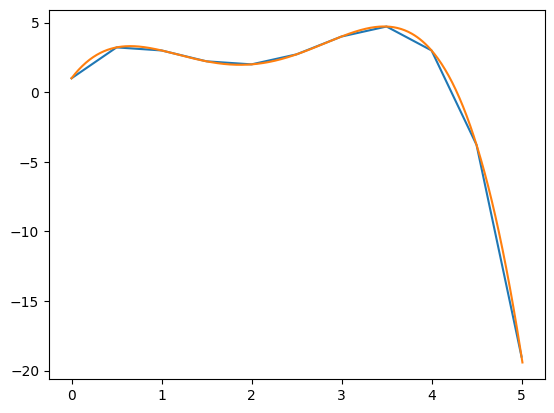

In [26]:
import matplotlib.pyplot as plt

plt.plot(x1,y1)
plt.plot(x2,y2)
plt.show()

In [14]:
?solve_ivp

In [27]:
x_eval = np.linspace(0, 5, 100)
res = solve_ivp(f,(0,5),[1], t_eval=x_eval)

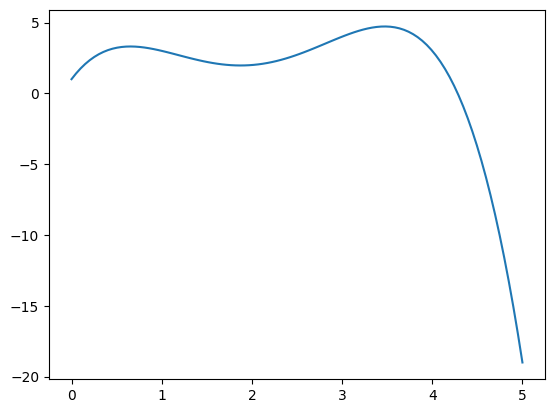

In [28]:
plt.plot(x_eval, res.y[0])

### Metodos de Runge-Kutta de ordem superiores

Quando precisamos de resultados com mais acuracia podemos usar o metodo de RK de quinta ordem sugerido por Butcher (1964)

$$
y_{i+1} = y_i + \frac{1}{90}(7 k_1 + 32k_3 + 12k_4 + 32k_5 + 7k_6)h
$$

em que

\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i + \frac{1}{4} h, y_i + \frac{1}{4}k_1 h)\\
k_3 &= f(x_i + \frac{1}{4} h, y_i + \frac{1}{8}k_1 h + \frac{1}{8}k_2 h)\\
k_4 &= f(x_i + \frac{1}{2} h, y_i - \frac{1}{2}k_2 h + k_3 h)\\
k_5 &= f(x_i + \frac{3}{4} h, y_i + \frac{3}{16}k_1 h + \frac{9}{16}k_4 h)\\
k_6 &= f(x_i + h, y_i - \frac{3}{7}k_1 h + \frac{2}{7}k_2 h + \frac{12}{7}k_3 h - \frac{12}{7}k_4 h+ \frac{8}{7}k_5 h)\\
\end{align*}

Exitem formulas para RK de ordem superiores mas raramente estão sendo usado. Na pratica, a acuracia adicional das ordens acima de 4 não compensa a complexidade e custo computacional.

<p align="center">
<img src="./images/9-rk5.png" width=300 height=450 />
</p>

### Sistemas de equações 

Muitos problemas práticos em engenharia e em ciência exigem a solução de um sistema
simultâneo de equações diferenciais ordinárias em vez de uma única equação. Tais sistemas podem ser representados de forma geral por

\begin{align*}
\frac{dy_1}{dx} &= f_1 (x,y_1, y_2, ..., y_n)\\
\frac{dy_2}{dx} &= f_2 (x,y_1, y_2, ..., y_n)\\
.\\
.\\
.\\
\frac{dy_n}{dx} &= f_n (x,y_1, y_2, ..., y_n)\\
\end{align*}

A solução de tal sistema exige que sejam conhecidas $n$ condições iniciais no valor inicial de $x$.

#### O Método de Euler

Todos os métodos discutidos nesta seção para uma única equação podem ser estendidos ao sistema que acabamos de mostrar. As aplicações em engenharia podem envolver milhares de equações simultâneas. Em cada caso, o procedimento para resolver um sistema de equações envolve simplesmente a aplicação da técnica de passo único em todas as equações para cada passo, antes de prosseguir para o próximo passo. Isso é mais bem ilustrado pelo próximo exemplo para o método de Euler, que é simples.


##### **Exemplo:**
Resolva o seguinte conjunto de equações diferenciais usando o método de Euler, supondo que, em $x = 0, y_1 = 4 \text{ e }  y_2 = 6$. Integre até $x = 2$ com um tamanho de passo de $0.5$.

\begin{align*}
y_1' &= -0.5 y_1 \\
y_2' &= 4 - 0.3y_2 - 0.1 y_1
\end{align*}

**Resposta**

\begin{align*}
y_1(0.5) &= 4 + [−0.5(4)]0.5 = 3 \\
y_2(0.5) &= 6 + [4 − 0.3(6) − 0.1(4)]0.5 = 6.9
\end{align*}

In [2]:
def _Euler(funcs, xi, yis, h):
    n = len(funcs)
    y = []
    for i in range(n):
        y.append(yis[i] + funcs[i](xi, *yis)*h)
    return y
        

In [3]:
def EulerSys(funcs, interval, yis, h):
    assert len(funcs) == len(yis), "yis and funcs must have the same size"
    xi, xf = interval
    X = [xi]
    Y = [yis]
    while xi < xf:
        y = _Euler(funcs, xi, Y[-1], h)
        Y.append(y)
        X.append(xi)
        xi += h
    return X, Y

In [37]:
f1 = lambda x, y1, y2: -0.5 * y1
f2 = lambda x, y1, y2: 4 - 0.3*y2 - 0.1 * y1
x0 = 0
xf = 2
interval = (x0 ,xf)
h = 0.1
yis = [4, 6]

In [38]:
X, Y = EulerSys((f1, f2), interval, yis, h)

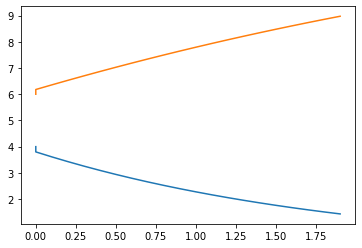

In [58]:
plt.plot(X, Y)
plt.show()

Agora vamos resolver usando `Scipy`

In [39]:
def Eq(x, arg):
    y1 = f1(x, *arg)
    y2 = f2(x, *arg)
    return y1, y2

In [40]:
t = np.linspace(x0, xf, 100)
res = solve_ivp(Eq, (x0,xf), [4, 6], t_eval=t)

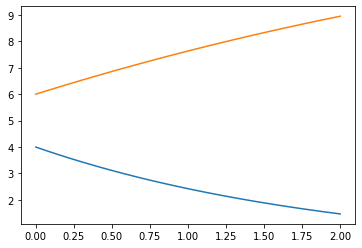

In [61]:
plt.plot(res.t, res.y[0])
plt.plot(res.t, res.y[1])
plt.show()

In [65]:
%timeit solve_ivp(Eq, (0,100), [4, 6], t_eval=t)

4.05 ms ± 65.7 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [66]:
%timeit EulerSys((f1, f2), (0, 100), yis, h=0.01)

12.6 ms ± 348 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


##### **Exercicio:**

No instante de tempo $t=0$, o Tanque 1 contém $10$ litros de água pura e o Tanque 2 contém $20$ litros de uma mistura de água com $12 Kg$ de sal. Água pura está sendo constantemente bombeada para dentro do Tanque 1 a uma taxa de $10$ litros por minuto, as misturas salinas são trocadas entre os dois tanques como na figura acima, e a mistura escoa do Tanque 2 a uma taxa de $10$ litros por minuto. Encontre a qualnidade de sal em cada tanque no instante de tempo $t=15$.

<p align="center">
<img src="./images/mistura.png" width=400 height=400 />
</p>


Implemente o metodo de Euler (e `Scipy`) para resolver o problema acima.


**Solução:**

Como a quantidade de líquido que entra em cada tanque é igual à quantidade que sai, o volume de mistura em cada tanque permanece constante. Então o Tanque 1 contém sempre $10$ litros de mistura e o Tanque 2 contém sempre $20$ litros de mistura. Agora sejam

$x_1(t)=$ quantidade de sal no Tanque 1 no instante $t$

$x_2(t)=$ quantidade de sal no Tanque 2 no instante $t$.


Como foram dados $x_1(0)=0\,{\rm Kg}$ e $x_2(0)=12\,{\rm Kg}$, segue que as quantidades desejadas podem ser obtidas resolvendo-se o seguinte PVI:

\begin{align*}
x_1'(t) &= -\frac{8}{5} x_1(t) + \frac{3}{10} x_2(t)\\
x_2'(t) &= \frac{8}{5} x_1(t) - \frac{4}{5} x_2(t)
\end{align*}


<p align="center">
<img src="./images/mistura-plot.png" width=400 height=300 />
</p>


#### Métodos de Runge-Kutta

Observe que qualquer um dos métodos RK de ordem superior deste capítulo pode ser aplicado para sistemas de equações — mas é preciso tomar cuidado na determinação das inclinações. Olhem para a figura das inclinações de RK4. As inclinações estão sendo calculadas nos **pontos diferentes**. Ou seja, primeiro desenvolvemos inclinações para todas as variáveis no valor inicial. Essas inclinações (um conjunto de $k_1$’s) são então usadas para fazer previsões da variável independente no ponto médio do intervalo. Os valores no ponto médio são, por sua vez, usados para calcular um conjunto de inclinações nos pontos médios (os $k_2$’s). Essas novas inclinações são então levadas de volta para o ponto inicial para fazer um outro conjunto de previsões no ponto médio que leva a novas previsões
de inclinações nos pontos médios (os $k_3$’s). Estes então são usados para fazer previsões no
ponto final do intervalo, que são utilizadas para desenvolver inclinações no final do intervalo (os $k_4$’s). Finalmente, os $k$’s são combinados em um conjunto de funções incremento e trazidos de volta para o ponto inicial para fazer a previsão final. O exemplo a seguir ilustra a abordagem.

##### **Exemplo:**
Use os métodos RK de quarta ordem para resolver as EDOs do exemplo anterior.

**Resposta**

Primeiro, precisamos determinar todas as inclinações no início do intervalo:

\begin{align*}
k_{1,1} &= f_1(0, 4, 6) = −0,5(4) = −2\\
k_{1,2} &= f_2(0, 4, 6) = 4 − 0.3(6) − 0.1(4) = 1.8
\end{align*}

em que $k_{i, j}$ é o $i$-ésimo valor de $k$ para a $j$-ésima variável dependente. A seguir, devemos calcular os primeiros valores de $y_1$ e $y_2$ no ponto médio:

\begin{align*}
y_1 + k_{1,1} \frac{h}{2} &= 4 + (-2)\frac{0.5}{2} = 3.5 \\
y_2 + k_{1,2} \frac{h}{2} &= 6 + (1.8)\frac{0.5}{2} = 6.45
\end{align*}

o que pode ser usado para calcular o primeiro conjunto de inclinações no ponto médio,

\begin{align*}
k_{2,1} &= f_1(0.25, 3.5, 6.45) = −1.75\\
k_{2,2} &= f_2(0.25, 3.5, 6.45) = 1.715
\end{align*}

Esses são usados para determinar o segundo conjunto de previsões para o ponto médio,

\begin{align*}
y_1 + k_{2,1} \frac{h}{2} &= 4 + (-1.75)\frac{0.5}{2} = 3.5625 \\
y_2 + k_{2,2} \frac{h}{2} &= 6 + (1.715)\frac{0.5}{2} = 6.42875
\end{align*}

que podem ser utilizados para calcular o segundo conjunto de inclinações no ponto médio,

\begin{align*}
k_{3,1} &= f_1(0.25, 3.5625, 6.42875) = −1.78125\\
k_{3,2} &= f_2(0.25, 3.5625, 6.42875) = 1.715125
\end{align*}

Esses são usados para determinar as previsões no final do intervalo

\begin{align*}
y_1 + k_{3,1} h &= 4 + (-1.78125)(0.5) = 3.109375 \\
y_2 + k_{3,2} h &= 6 + (1.715125)(0.5) = 6.857563
\end{align*}

que podem ser utilizados para calcular as inclinações na extremidade final,

\begin{align*}
k_{4,1} &= f_1(0.5, 3.109375, 6.857563) = −1.554688\\
k_{4,2} &= f_2(0.5, 3.109375, 6.857563) = 1.631794
\end{align*}

Os valores de $k$ podem então ser usados para calcular

\begin{align*}
y_1(0.5) &= 4 + \frac{1}{6}[−2 + 2(−1.75 − 1.78125) − 1.554688]0.5 = 3.115234\\
y_2(0.5) &= 6 + \frac{1}{6}[1.8 + 2(1.715 + 1.715125) + 1.631794]0.5 = 6.857670
\end{align*}

### Algoritmos Computacionais para a Resolução de Sistemas de EDOs

O código computacional para resolver uma única EDO pelo método de Euler pode ser facilmente estendido para sistemas de equações. As modificações incluem:

1. Entrar o número de equações, n.
2. Entrar os valores iniciais de cada uma das n variáveis dependentes.
3. Modificar o algoritmo de modo que ele calcule inclinações para cada uma das
variáveis dependentes.
4. Incluir equações adicionais para calcular os valores da derivada para cada uma
das EDOs.
4. Incluir laços para calcular um novo valor para cada variável dependente.

Tal algoritmo está delineado na figura abaixo para o método RK de quarta ordem.


<p align="center">
<img src="./images/9-rk4-sys.png" width=600 height=900 />
</p>

#### **Example:**
Um programa de computador para implementar o método RK de quarta ordem para sistemas pode ser desenvolvido facilmente com base na figura acima. Tal software torna conveniente a comparação de diferentes modelos para um sistema físico. Por exemplo, um modelo linear para o pêndulo oscilante é dado por 

\begin{align*}
\frac{dy_1}{dx} &= y_2\\
\frac{dy_2}{dx} &= -16.1 y_1
\end{align*}

em que $y_1$ e $y_2$ são o deslocamento angular e a velocidade, respectivamente. Um modelo
não-linear para o mesmo sistema é

\begin{align*}
\frac{dy_3}{dx} &= y_4\\
\frac{dy_4}{dx} &= -16.1 \sin(y_3)
\end{align*}

em que $y_3$ e $y_4$ são o deslocamento angular e a velocidade para o caso não-linear. Resolva
esses sistemas para dois casos: (a) um pequeno deslocamento inicial ($y_1 = y_3 = 0.1$
radianos; $y_2 = y_4 = 0$) e (b) um grande deslocamento ($y_1 = y_3 = \pi /4 = 0.785398$ ra
dianos; $y_2 = y_4 = 0$).

**Resposta**



In [33]:
f1 = lambda x,y1, y2, y3, y4: y2
f2 = lambda x, y1, y2, y3, y4: -16.1 * y1 
f3 = lambda x, y1, y2, y3, y4: y4
f4 = lambda x, y1, y2, y3, y4: -16.1 * np.sin(y3)

funcs = [f1, f2, f3, f4]

x0 = 0
xf = 4

y0s = [0.1, 0, 0.1, 0]


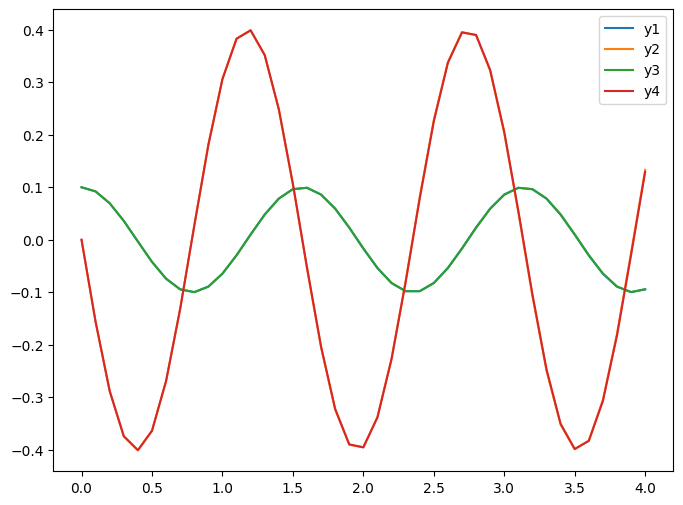

In [66]:
X, Y = cn.RK4sys(funcs, (x0, xf), y0s)
plt.figure(figsize=(8,6))
plt.plot(X, Y)
plt.legend(('y1', 'y2', 'y3', 'y4'))
plt.show()

Agora vamos resolver usando `scipy`

In [23]:
f1 = lambda x,y1, y2, y3, y4: y2
f2 = lambda x, y1, y2, y3, y4: -16.1 * y1 
f3 = lambda x, y1, y2, y3, y4: y4
f4 = lambda x, y1, y2, y3, y4: -16.1 * np.sin(y3)

def Eq(t, args):
    y1 = f1(t, *args)
    y2 = f2(t, *args)
    y3 = f3(t, *args)
    y4 = f4(t, *args)
    return y1, y2, y3, y4

x0 = 0
xf = 4
interval = (x0, xf)
y0s = [0.1, 0, 0.1, 0]
t_eval = np.linspace(0, 4, 100)

res = solve_ivp(Eq, interval, y0s, t_eval=t_eval)

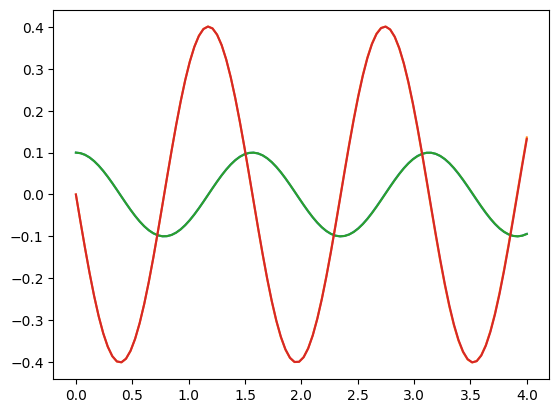

In [25]:
plt.plot(t_eval, res.y.T)

In [31]:
fig = go.Figure()
fig.add_scatter(x=t_eval, y=res.y[0])
fig.add_scatter(x=t_eval, y=res.y[1])
fig.add_scatter(x=t_eval, y=res.y[2])
fig.add_scatter(x=t_eval, y=res.y[3])

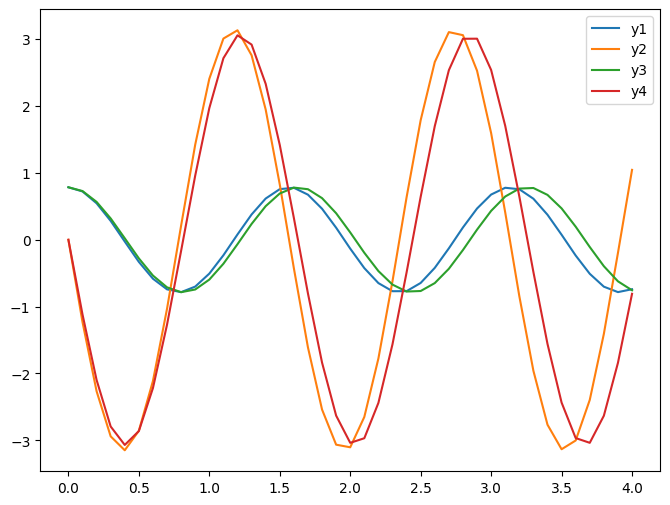

In [34]:
y0s = [0.785398, 0, 0.785398, 0]

X, Y = cn.RK4sys(funcs, (x0, xf), y0s)

plt.figure(figsize=(8,6))
plt.plot(X, Y)
plt.legend(('y1', 'y2', 'y3', 'y4'))
plt.show()

E o `scipy` dá

In [35]:
y0s = [0.785398, 0, 0.785398, 0]

res = solve_ivp(Eq, interval, y0s, t_eval=t_eval)

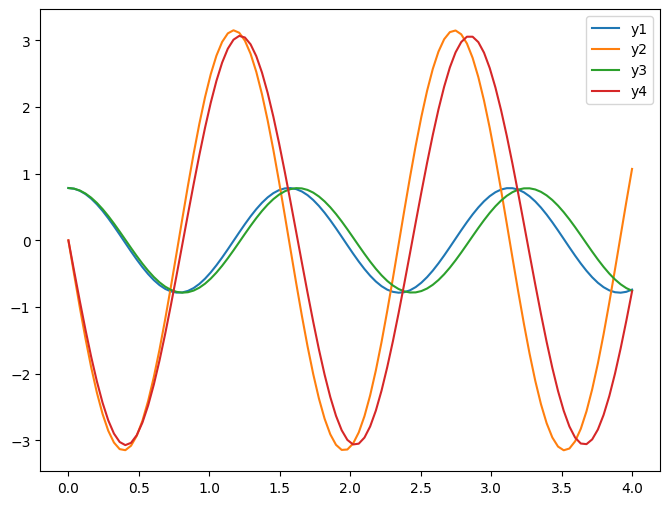

In [36]:
plt.figure(figsize=(8,6))
plt.plot(t_eval, res.y.T)
plt.legend(('y1', 'y2', 'y3', 'y4'))
plt.show()

### EDO de segunda ordem

transformamos em duas equações de primeira ordem usando uma função auxiliar. Em geral, uma ODE de segunda ordem pode ser escrito na seguinte forma

$$
y'' = \frac{d^2y}{dx^2} = f(x, y)
$$

definindo a função auxilir como a primeira derivada da $y$ temos

\begin{align*}
y' &= v(x, y)\\
v' &= f(x, y)
\end{align*}

onde $v(x, y)$ é a função auxiliar. Para conferir a situação, basta derivar a primeira equação $(y'' = v'(x, y))$ e substituir a segunda equação no resultado da derivada. Assim recuperamos a equação da segunda ordem.

Com essa tecnica, temos um sistema de ODE com duas equações de primeira ordem em vez de uma equação de segunda ordem.

#### Exemplo: 
Use o metodo de Euler para resolver 

$$
\frac{d^2y}{dt^2} - 0.5 t + y = 0
$$
onde $y(0) = 2$ e $y'(0)= 0$. Resolve no intervalo $x \in (0, 5)$ e usando $h = 0.1$. Plota o resultado e compara com o resultado do `scipy`. 

**Resolução:**
Redefinindo a equação chegamos no seguinte sistema

\begin{align*}
\frac{dy_1}{dt} &= y_2 \\
\frac{dy_2}{dt} &= 0.5 t - y_1
\end{align*}

onde $y_1(0) = 2$ e $y_2(0)= 0$

In [4]:
f1 = lambda t, y1, y2: y2
f2 = lambda t, y1, y2: 0.5*t - y1
x0 = 0.
xf = 5.
interval = (x0 ,xf)
h = 0.01
yis = [2., 0.]

In [5]:
X, Y = EulerSys((f1, f2), interval, yis, h)

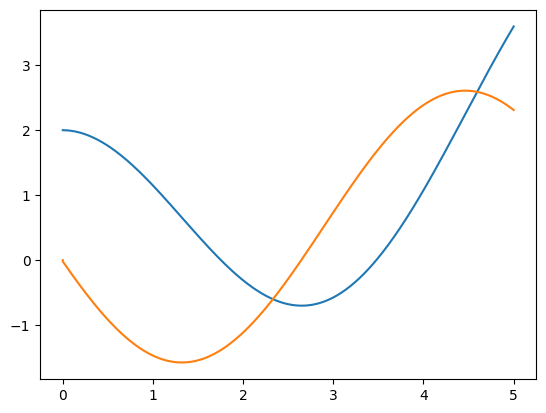

<Figure size 800x600 with 0 Axes>

In [6]:
plt.plot(X, Y)
plt.figure(figsize=(8,6))
plt.show()

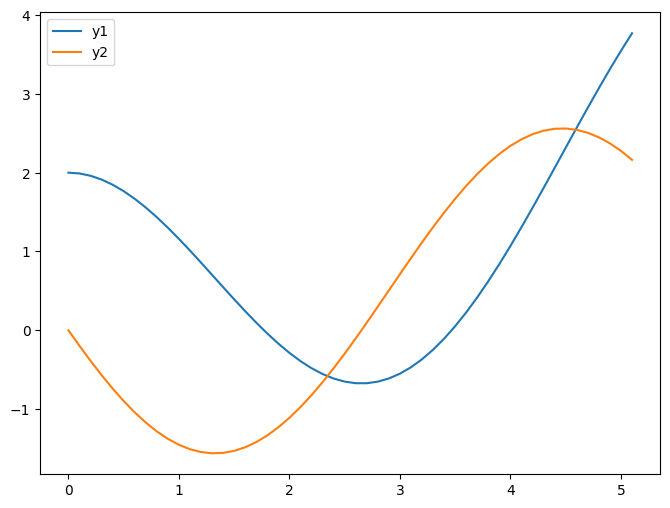

In [7]:
X, Y = cn.RK4sys((f1, f2), (x0, xf), yis)
plt.figure(figsize=(8,6))
plt.plot(X, Y)
plt.legend(('y1', 'y2'))
plt.show()

In [8]:
def Eq(x, arg):
    y1 = f1(x, *arg)
    y2 = f2(x, *arg)
    return y1, y2

In [13]:
t_eval = np.linspace(x0, xf, 100)
res = solve_ivp(Eq, interval, yis, t_eval=t_eval)

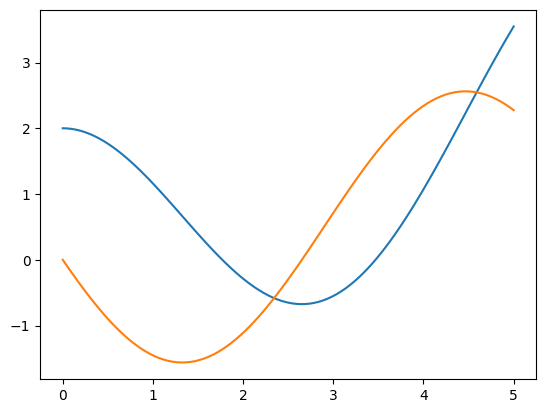

In [14]:
plt.plot(t_eval, res.y.T)
plt.show()

### Exemplo: 
Lorenz system é um EDO que é notável por ter soluções caóticas para certos valores de parâmetros e condições iniciais. Em particular, o atrator de Lorenz é um conjunto de soluções caóticas do sistema de Lorenz. Na mídia popular, o "efeito borboleta" decorre das implicações do mundo real do atrator de Lorenz, ou seja, em um sistema físico caótico, na ausência de conhecimento perfeito das condições iniciais (mesmo a minúscula perturbação do ar devido a uma borboleta batendo suas asas), nossa capacidade de prever seu curso futuro sempre falhará. Isso ressalta que os sistemas físicos podem ser completamente determinísticos e, ainda assim, inerentemente imprevisíveis.

$$
\begin{cases}
\frac{dx}{dt} &= \sigma (y - x) \\
\frac{dy}{dt} &= x (\rho - z) - y \\
\frac{dz}{dt} &= x y - \beta z 
\end{cases}
$$

Resolvem este sistema para $\rho = 28, \sigma=10$ e $\beta=\frac{8}{3}$ no intervalo $t \in [0, 100]$. E as condições iniciais são $x(0)=1, y(0) = 1$ e $z(0)=1$ 

## Métodos de Runge-Kutta Adaptativos

Até este ponto, apresentamos métodos para resolver EDOs que empregam um
tamanho de passo constante. Para um número significativo de problemas, isso pode
representar uma limitação séria. Por exemplo, suponha que estejamos integrando uma
EDO com uma solução do tipo descrito na figura abaixo. Para a maior parte do intervalo, a solução varia gradualmente. Tal comportamento sugere que um tamanho de
passo razoavelmente grande poderia ser utilizado para obter resultados adequados.
Entretanto, para uma região localizada de $x = 1.75$ a $x = 2.25$, a solução passa por
uma variação abrupta. A conseqüência prática de lidar com tais funções é que seria
necessário um tamanho de passo muito pequeno para capturar adequadamente o comportamento impulsivo. Se fosse utilizado um algoritmo com tamanho de passo constante, o pequeno tamanho de passo necessário para a região de variação abrupta teria de ser aplicado em todo o cálculo. Como conseqüência, um tamanho de passo muito menor do que o necessário — e, portanto, muito mais cálculos — seria desperdiçado na região de variação gradual.
Os algoritmos que ajustam automaticamente o tamanho do passo podem evitar tais
exageros e, portanto, apresentam grande vantagem. Como eles se “adaptam” à trajetória
da solução, dizemos que têm controle adaptativo do tamanho do passo. A implementação
dessas abordagens exige que uma estimativa do erro de truncamento local seja obtida em
cada passo. Então, essa estimativa de erro pode servir de base ou para aumentar ou para
diminuir o tamanho do passo.

<p align="center">
<img src="./images/9-adap.png" width=300 height=400 />
</p>

### Método RK Adaptativo ou de Divisão do Passo na Metade

A *divisão do passo na metade* (também chamado *RK adaptativo*) envolve fazer cada
passo duas vezes, uma como um passo completo, e independentemente, como dois meio
passos. A diferença nos dois resultados representa uma estimativa do erro de truncamento
local. Se $y_1$ designar a previsão por um único passo e $y_2$ designar a previsão usando dois
meio passos, o erro $\Delta$ pode ser representado por

$$\Delta = y_2 - y_1$$

Além de fornecer um critério para o controle do tamanho do passo, a equação acima
também pode ser usada para corrigir a previsão $y_2$. Para a versão RK de quarta ordem, a
correção é

$$y_2 \leftarrow y_2 + \frac{\Delta}{15}$$

Essa estimativa é acurada até a quinta ordem.

#### **Exemplo:**

Use o método RK de quarta ordem adaptativo para integrar $y' = 4e^{0.8x} − 0.5y$ de $x = 0 \text{ a } 2$ usando $h = 2$ e uma condição inicial $y(0) = 2$. Esta é a mesma equação diferencial que foi resolvida anteriormente no Exemplo 25.5. Lembre-se
de que a solução verdadeira é $y(2) = 14.84392$.

**Resposta**

A previsão única com um passo h é calculada como

$$y(2) = 2 + [3 + 2(6.40216 + 4.70108) + 14.11105]2 = 15.10584 $$


As duas previsões de meio passo são

$$y(1) = 2 + \frac{1}{6}[3 + 2(4.21730 + 3.91297) + 5.945681]1 = 6.20104 $$

e

$$y(2) = 6.20104 + \frac{1}{6}[5.80164 + 2(8.72954 + 7.99756) + 12.71283]1 = 14.86249$$

Portanto, o erro aproximado é

$$
E_a = \frac{14.86249 − 15.10584}{15} = -0.01622
$$

que se compara favoravelmente com o erro verdadeiro de

$$E_t = 14.84392 − 14.86249 = −0.01857$$

A estimativa de erro também pode ser usada para corrigir a previsão

$$y(2) = 14.86249 − 0.01622 = 14.84627$$

a qual tem um $E_t = −0.00235$.

### Runge-Kutta Fehlberg

Além de dividir o passo na metade como estratégia para ajustar o tamanho do passo, uma
abordagem alternativa para obter uma estimativa do erro envolve o cálculo de duas previsões RK de ordens diferentes. Os resultados podem então ser subtraídos para se obter uma estimativa do erro de truncamento local. Uma desvantagem dessa abordagem é que ela aumenta muito o gasto computacional. Por exemplo, previsões de quarta e quinta ordens equivalem a um cálculo de dez valores de função no total por passo. O método de *Runge-Kutta Fehlberg* ou *RK embutido* contorna esse problema de forma inteligente pelo uso de um método RK de quinta ordem que utiliza os cálculos de função do método RK de quarta ordem que o acompanha. Assim, a abordagem fornece uma estimativa de erro com base em apenas seis cálculos de função!

No caso presente, usamos a seguinte estimativa de quarta ordem

$$
y_{i+1} = y_i + (\frac{37}{378}k_1 + \frac{250}{621}k_3 + \frac{125}{594}k_4 + \frac{512}{1771}k_6)h 
$$

junto com a fórmula de quinta ordem:

$$
y_{i+1} = y_i + (\frac{2825}{27648}k_1 + \frac{18575}{48384}k_3 + \frac{13525}{55296}k_4 + \frac{277}{14336}k_5 + \frac{1}{4}k_6)h 
$$

em que

\begin{align*}
k_1 &= f(x_i, y_i)\\
k_2 &= f(x_i+ \frac{1}{5}h, y_i+ \frac{1}{5}k_1 h)\\
k_3 &= f(x_i+ \frac{3}{10}h, y_i+ \frac{3}{40}k_1 h + \frac{9}{40}k_2h)\\
k_4 &= f(x_i+ \frac{3}{5}h, y_i+ \frac{3}{10}k_1 h - \frac{9}{10}k_2h + \frac{6}{5}k_3h)\\
k_5 &= f(x_i+ h, y_i - \frac{11}{54}k_1 h + \frac{5}{2}k_2h - \frac{70}{27}k_3h + \frac{35}{27}k_4h)\\
k_6 &= f(x_i+ \frac{7}{8}h, y_i + \frac{1631}{55296}k_1 h + \frac{175}{512}k_2h + \frac{575}{13824}k_3h + \frac{44275}{110592}k_4h + \frac{253}{4096}k_5 h)\\
\end{align*}

Assim, a EDO pode ser resolvida com a equação da quinta ordem e a estimativa de erro obtida,
como a diferença das estimativas de quinta e quarta ordens. Deve ser observado que os
coeficientes particulares usados foram desenvolvidos por Cash e Karp (1990). Portanto,
esse método é algumas vezes chamado de *RK de Cash-Karp*.

### Controle do Tamanho do Passo

Agora que desenvolvemos maneiras de obter estimativas do erro de truncamento local,
elas podem ser usadas para ajustar o tamanho do passo. Em geral, a estratégia é aumentar
o tamanho do passo se o erro for muito pequeno e diminuir se o erro for muito grande.
Press et al. (1992) sugeriram o seguinte critério para conseguir isso:

$$
h_{novo} = h_{atual} |\frac{\Delta_{novo}}{\Delta_{atual}}|^\alpha
$$

em que hatual e hnovo são os tamanhos de passo atual e novo, respectivamente, $\Delta_{atual}$ é a acurácia atual calculada, $\Delta_{novo}$ é a acurácia desejada e α é uma potência constante que é igual a $0.2$ quando o tamanho do passo é aumentado (isto é, quando $\Delta_{atual} \le  \Delta_{novo}$) e a $0.25$ quando o tamanho do passo é diminuído ($\Delta_{atual} >  \Delta_{novo}$).
O parâmetro chave na equação acima é obviamente $\Delta_{novo}$, pois é o seu veículo para
especificar a acurácia desejada. Uma maneira de fazer isso seria relacionar $\Delta_{novo}$ a um nível de erro relativo. Embora isso funcione bem quando ocorrem apenas valores positivos, pode causar problemas para soluções que passem pelo zero. Por exemplo, você poderia estar simulando uma função oscilante que passe repetidamente pelo zero, mas que seja limitada por valores absolutos máximos. Para tal caso, você poderia querer incluir esses valores máximos na acurácia desejada.

Uma forma mais geral de lidar com tais casos é determinar $\Delta_{novo}$ como

$$
\Delta_{novo} = \varepsilon y_{scale}
$$

em que $\varepsilon$ é um nível de tolerância geral. Sua escolha de yescala determinará, então, como é a escala do erro. Por exemplo, se $y_{scale} = y$, a precisão será formulada em termos de erros relativos fracionários. Se você estiver tratando um caso no qual queira erros constantes em relação a um limitante máximo prescrito, iguale yescala a esse limitante. Um truque sugerido por Press et al. (1992) para obter erros relativos constantes, exceto muito próximo a cruzamentos com o zero, é

$$
y_{scale} = |y| + |h\frac{dy}{dx}| = |y| + |hf(x,y)|
$$

Essa é a versão que usaremos em nosso algoritmo.

#### **Exemplo:**

O método RK adaptativo é adequado para a seguinte equação
diferencial ordinária

$$
\frac{dy}{dx} + 0.6y = 10e^{-(x-2)^2/2(0.075)^2}
$$

Observe que, para a condição inicial $y(0) = 0.5$, a solução da equação homogênea associada é

$$
y = 0.5 e^{-0.6x}
$$

que é uma curva lisa que gradualmente se aproxima de zero conforme x aumenta. Em
contraste, a solução da equação não-homogênea passa por uma transição abrupta na vizinhança de $x = 2$ por causa da natureza do termo forçante. 
Use um esquema RK de quarta ordem padrão para resolver a EDO de $x = 0 \text{ a } 4$. A
seguir, use o esquema adaptativo descrito nesta seção para fazer o mesmo cálculo.

**Resposta**

Primeiro vamos os recursos do `scipy` para resolver o problema. 


In [10]:
x0 = 0
y0 = 0.5
func = lambda x, y: 10*np.exp(-(x-2)**2/(2*0.075**2)) - 0.6*y

In [11]:
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

In [12]:
res = solve_ivp(func, (0,4), [0.5], t_eval=np.linspace(0,4, 200), method='RK45')

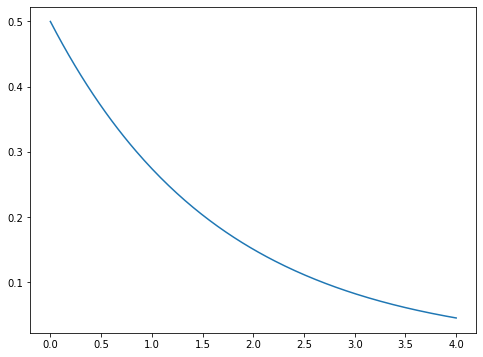

In [13]:
plt.figure(figsize=(8,6))
plt.plot(res.t, res.y[0])
plt.show()

Agora vamos um metodo adaptativo

In [14]:
res = solve_ivp(func, (0,4), [0.5], t_eval=np.linspace(0,4, 200), method='LSODA')

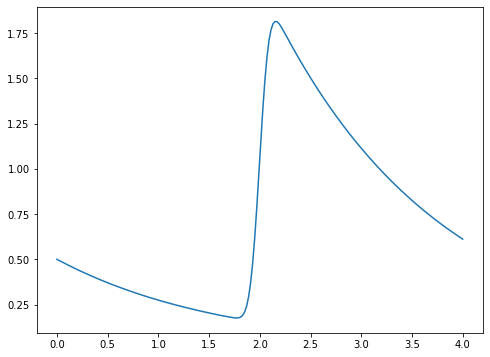

In [15]:
plt.figure(figsize=(8,6))
plt.plot(res.t, res.y[0])
plt.show()

# Rigidez e Métodos de Passo Múltiplo

A rigidez é um problema especial que pode aparecer na solução de equações diferenciais ordinárias. Um sistema rígido é aquele que envolve componentes variando rapidamente junto com componentes variando lentamente. Em muitos casos, as componentes que variam rapidamente são transientes efêmeros que desaparecem rapidamente, depois do que a solução passa a ser dominada pelas componentes que variam lentamente. Embora os fenômenos transientes existam apenas para uma pequena parte do intervalo de integração, podem determinar o passo no tempo para toda a solução.

## Rigidez

Tanto as EDOs individuais quanto os sistemas de EDO podem ser rígidos. Um
exemplo de uma única EDO rígida é

$$
\frac{dy}{dt} = -1000 y + 3000 - 2000 e^{-t}
$$

Se $y(0)$ = 0, a solução analítica pode ser escrita como

$$
y = 3 - 0.998 e^{-1000t} - 2.002 e^{-t}
$$

A solução é inicialmente dominada pelo termo exponencial rápido ($e^{−1000t}$ ). Depois de um curto período ($t < 0.005$), esse transiente desaparece e a solução passa a ser dominada pela exponencial lenta ($e^{−t}$ ).

Podemos ganhar uma percepção do tamanho do passo necessário para a **estabilidade** de tal solução examinando a parte homogênea da equação

$$
\frac{dy}{dt} = -a y
$$

Se $y(0) = y_0$, o cálculo pode ser usado para determinar a solução como

$$
y = y_0 e^{-a t}
$$

Logo, a solução começa em $y_0$ e se aproxima assintoticamente de zero.

O método de Euler pode ser usado para resolver o mesmo problema numericamente:

$$
y_{i+1} = y_i + \frac{dy_i}{dt} h
$$

Substituindo a equação principal obtemos

$$
y_{i+1} = y_i - a y_i h \qquad\text{  ou  } \qquad y_{i+1} = y_i (1- a h) 
$$

A estabilidade dessa fórmula depende claramente do tamanho do passo h. Isto é, $|1 − ah|$ deve ser menor do que 1. Logo, se $h > 2/a$, $|y_i| → \infty$ quando $i \rightarrow \infty$ .

Superficialmente, você poderia supor que as rotinas adaptativas do tamanho do passo descritas no final do último capítulo poderiam oferecer uma solução para esse dilema. Poderia pensar que elas usariam pequenos passos durante os transientes rápidos e passos grandes caso contrário. Entretanto, esse não é o caso, porque as exigências de estabilidade ainda fariam que fosse necessário usar tamanhos de passo muito pequenos ao longo de toda a solução.
Em vez de usar abordagens explícitas, os métodos implícitos oferecem um recurso alternativo. Tais representações são chamadas implícitas porque a incógnita aparece em ambos os lados da equação. Uma forma implícita do método de Euler pode ser desenvolvida pelo cálculo da derivada em um instante futuro,

$$
y_{i+1} = y_i + \frac{y_{i+1}}{dt}h 
$$
Isso é chamado de método de **Euler regressivo** ou **implícito**. A substituição na equação principal fornece

$$
y_{i+1} = y_i - a y_{i+1} h
$$

que pode ser resolvida por

$$
y_{i+1} = \frac{y_i}{1 + ah}
$$

Nesse caso, independentemente do tamanho do passo, $|y_i | \rightarrow 0$ quando $i \rightarrow \infty$. Assim, a abordagem é chamada **incondicionalmente estável**.

### **Exemplo:**

Use os métodos de Euler implícito e explícito para resolver

$$
\frac{dy}{dt} = -1000 y + 3000 - 2000 e^{-t}
$$

em que $y(0) = 0$. 

(a) Use Euler explícito com tamanhos de passo de $0.0005$ e $0.0015$ para
determinar y entre $t = 0$ e $0,006$. 

(b) Use Euler implícito com tamanho de passo de $0.05$ para determinar $y$ entre $0$ e $0.4$.

**Resposta**

<p align="center">
<img src="./images/9-implicit.png" width=300 height=400 />
</p>

Os sistemas de EDOs também podem ser rígidos. Um exemplo é

\begin{align*}
\frac{dy_1}{dt} &= -5 y_1 + 3y_2 \\
\frac{dy_2}{dt} &= 100 y_1 -301 3y_2 \\
\end{align*}

Para condições iniciais $y_1(0) = 52.29$ e $y_2(0) = 83.82$, a solução exata é

\begin{align*}
y_1 &= 52.96e^{−3.9899t} − 0.67e^{−302.0101t}\\
y_2 &= 17.83e^{−3.9899t} + 65.99e^{−302.0101t}
\end{align*}

Observe que os expoentes são negativos e diferem em cerca de duas ordens de grandeza. Como no caso de uma única equação, são os expoentes grandes que respondem rapidamente e são o cerne da rigidez do problema.

Um método de Euler implícito para sistemas pode ser formulado para o caso presente como

\begin{align*}
y_{1,i+1} &= y_{1,i} + (−5y_{1,i+1} + 3y_{2,i+1} )h \\
y_{2,i+1} &= y_{2,i} + (100y_{1,i+1} − 301y_{2,i+1} )h
\end{align*}

Agrupando os termos, obtemos

\begin{align*}
(1 + 5h)y_{1,i+1} − 3hy_{2,i+1} &= y_{1,i} \\
−100hy_{1,i+1} + (1 + 301h)y_{2,i+1} &= y_{2,i}
\end{align*}

Logo, podemos ver que o problema consiste em resolver um conjunto de equações simultâneas para cada passo no tempo.

Para EDOs não-lineares, a solução se torna ainda mais difícil, já que envolve a resolução de um sistema de equações simultâneas não-lineares 
Assim, embora se ganhe estabilidade com as abordagens implícitas, é pago um preço na forma de um aumento da complexidade da solução.

O método de Euler implícito é incondicionalmente estável e acurado apenas em
primeira ordem. Também é possível desenvolver de forma parecida um esquema de integração usando a regra do trapézio implícita, acurada até segunda ordem, para sistemas rígidos. Em geral é desejável obter métodos de ordem superior. As fórmulas de Adams-Moulton descritas depois neste capítulo também podem ser usadas para obter métodos implícitos de ordem superior. Entretanto, os limites de estabilidade de tais abordagens são muito severos quando aplicados a sistemas rígidos. Gear (1971) desenvolveu uma série
especial de esquemas implícitos que têm limites de estabilidade muito maiores baseados em fórmulas de diferença regressiva. Esforços consideráveis têm sido feitos para desenvolver softwares que implementem eficientemente os métodos de Gear. Como resultado, esse provavelmente é o método mais amplamente usado para resolver sistemas rígidos.
Além disso, Rosenbrock e outros (ver Press et al., 1992) propuseram algoritmos de Runge-Kutta implícitos em que k termos apareciam implicitamente. Esses métodos têm boas características de estabilidade e são bastante adequados para a solução de sistemas de equações diferenciais rígidos.

## Métodos de passo múltiplo

Os métodos de passo único descritos nas seções anteriores utilizam informações em um único ponto $x_i$ para prever um valor da variável dependente $y_{i+1}$ em um ponto futuro $x_{i+1}$. Abordagens alternativas chamadas métodos de passo múltiplo são baseadas na percepção de que, uma vez que o cálculo tenha começado, informação valiosa de pontos anteriores está a nossa disposição. A curvatura das linhas ligando esses valores anteriores fornece informação com relação à trajetória da solução. Os métodos de passo múltiplo explorados neste capítulo usam essa informação para resolver EDOs. Antes de descrever as versões de ordem superior, apresentaremos um método simples de segunda ordem que serve para ilustrar as características gerais das abordagens de passo múltiplo.

<p align="center">
<img src="./images/9-multi.png" width=500 height=300 />
</p>

### O Método de Heun de Início Não-automático

Lembre-se de que a abordagem de Heun usa o método de Euler como um preditor

$$
y^0_{i+1} = y_i + f(x_i, y_i)h
$$

e a regra do trapézio como um corretor

$$
y_{i+1} = y_i + \frac{f(x_i, y_i) + f(x_{i+1}, y^0_{i+1})}{2} h
$$

Logo, o preditor e o corretor têm erros de truncamento locais de $\mathcal{O}(h^2)$ e $\mathcal{O}(h^3)$, respectivamente. Isso sugere que o preditor é o elo fraco no método, já que tem o erro maior. Essa fraqueza é significativa, pois a eficiência do passo iterativo de correção depende da acurácia da previsão inicial. Conseqüentemente, uma forma de melhorar o método de Heun é desenvolver um preditor que tenha um erro local de $\mathcal{O}(h^3)$. Pode-se conseguir isso usando o método de Euler e a inclinação em $y_i$ e informação extra de um ponto anterior $y_{i−1}$, como em

$$
y^0_{i+1} = y_{i-1} + f(x_i, y_i)2h
$$

Observe que a equação acima alcança $\mathcal{O}(h^3)$ usando um tamanho de passo maior, $2h$. Além disso, observe que a equação acima não é de início automático, pois envolve um valor anterior da variável dependente $y_{i−1}$. Tal valor não estaria disponível em um problema de valor inicial típico. Por causa desse fato, as equações acima são chamadas de método de **Heun de início não-automático**.

Resumindo o metodo do Heun temos

\begin{align*}
\text{Preditor: }\qquad y^0_{i+1} &= y^m_{i-1} + f(x_i, y_i^m)2h \\
\text{Corretor: }\qquad y^j_{i+1} &= y^m_i + \frac{f(x_i,y^m_i) + f(x_{i+1},y^{j-1}_{i+1})}{2} h
\end{align*}

(para $j = 1, 2, . . . , m$).

em que os sobrescritos foram adicionados para denotar que o corretor é aplicado iterativamente de $j = 1$ a $m$ para obter soluções refinadas. Observe que $y_i^m$ e $y^m_{i−1}$ são o resultado final das iterações do corretor nos passos anteriores no tempo. Param-se as iterações
em qualquer passo no tempo com base no seguinte critério de parada

$$
|\varepsilon_a| = |\frac{y_{i+1}^j - y_{i+1}^{j-1}}{y_{i+1}^j}| 100\%
$$

Quando $\varepsilon_a$ for menor do que uma tolerância de erro pré-especificada, param-se as iterações.

### **Exemplo:**

Use o método de Heun de início não-automático para fazer os mesmos cálculos feitos anteriormente no com o método de Heun. Isto é, integre $y' = 4e^{0.8x} − 0.5y$ de $x = 0$ a $x = 4$ usando um tamanho de passo de $1.0$. A condição inicial em $x = 0$ é $y = 2$. Entretanto, como agora estamos lidando com um método de passo múltiplo, precisamos da informação adicional de que $y$ é igual a $−0.3929953$ em $x = −1$.

**Resposta:**

In [2]:
def heun_NA(func, xi, yis, h, n=1):
    y1 = yis[1] + func(xi, yis[0])*(2*h)
    for j in range(n):
        y_prime = func(xi+h, y1)
        y_mid = (y_prime + func(xi, yis[0]))/2
        y_new = yis[0] + y_mid * h
        y1 = y_new
    return y_new

In [10]:
f = lambda x, y: 4*np.exp(0.8*x) - 0.5*y
x0 = 0
y0 = (-0.3929953, 2)
h = 1.
xf = 4

In [11]:
for i in range(5):
    print(x0, y0)
    y = heun_NA(f, x0, y0, h, n=5)
    x0 += h
    y0 = (y0[1], y)

0 (-0.3929953, 2)
1.0 (2, 4.919728533132468)
2.0 (4.919728533132468, 12.677867424584534)
3.0 (12.677867424584534, 28.495344814306712)
4.0 (28.495344814306712, 64.45726988788691)


E o metodo de Euler dá

In [12]:
def euler(func, xi, yi, h=1):
    return yi + func(xi, yi) * h

In [14]:
x0 = 0
y0 = 2
h = 1.
xf = 4
for i in range(5):
    print(x0, y0)
    y0 = euler(f, x0, y0, h)
    x0 += h

0 2
1.0 5.0
2.0 11.402163713969871
3.0 25.513211554565395
4.0 56.84931129984912


Vamos perguntar para o `scipy`

In [17]:
res = solve_ivp(f, (0,4), [2])
res.y

array([[ 2.        ,  2.28411606,  6.27881264, 24.06083504, 75.34536894]])

# Problemas de Contorno e de Autovalores

De fato, até agora a gente estava estudando os problemas com valores iniciais. Para uma equação de ordem $n$, são necessárias $n$ condições. Se todas as condições forem especificadas no mesmo valor da variável independente, então, estamos lidando com um *problema de valor inicial*.

Em contraste, existe outra aplicação para a qual as condições não são conhecidas em um único ponto, mas, em vez disso, são conhecidas em valores diferentes da variável independente. Como esses valores normalmente são especificados nas extremidades ou fronteiras do sistema, eles, em geral, são conhecidos como *problemas de contorno*.

Nesta seção vamos discutir duas abordagens gerais para obter sua solução: o *método shooting* e a abordagem por *diferença finita*. Adicionalmente, apresentamos técnicas para abordar um tipo especial de problema de contorno: a determinação de autovalores. É claro que os autovalores também têm muitas aplicações além daquelas envolvidas nos problemas de contorno.

<p align="center">
<img src="./images/9-bvp1.png" width=500 height=800 />
</p>

## Métodos Gerais para Problemas de Contorno

A conservação do calor pode ser usada para desenvolver um balanço de calor para uma haste longa e fina (figura abaixo). Se a haste não estiver isolada ao longo de seu comprimento e se o sistema estiver em um estado estacionário, a equação resultante será 

$$
\frac{d^2T}{dx^2} + h'(T_a - T) = 0 \tag{abc}
$$

onde $h'$ é o coeficiente de transferência de calor $(m^{−2})$ que parametriza as taxas de dissipação de calor para o ar em torno e $T_a$ é a temperatura do ar em torno (C).

Para obter uma solução da equação acima, devem existir condições de contorno
adequadas. Um caso simples é quando as temperaturas nas extremidades da barra são mantidas em valores fixos. Estas podem ser expressas matematicamente por

\begin{align*}
T(0) &= T_1 \\
T(L) &= T_2
\end{align*}

Com essas condições, a equação principal pode ser resolvida analiticamente usando-se o cálculo. Para uma haste de $10$ m com $T_a = 20, T_1 = 40, T_2 = 200$ e $h' = 0.01$, a solução é

$$
T = 73.4523e^{0.1x} - 53.4523e^{-0.1x} + 20
$$

Nas subseções seguintes, o mesmo problema será resolvido usando-se abordagens numéricas.

<p align="center">
<img src="./images/9-calor.png" width=250 height=170 />
</p>

### O Método Shooting

O método shooting (de atirar, em inglês) é baseado na conversão de um problema de contorno em um problema de valor inicial equivalente. Uma abordagem de tentativa e erro é, então, implementada para resolver a versão de valor inicial. Essa abordagem pode ser ilustrada por um exemplo.

#### **Exemplo:**
Use o método shooting para resolver a equação de conduçao de calor para
uma haste de $10 m$ com $h' = 0.01 m^{−2}, T_a = 20$ e condições de contorno

$$
T(0) = 40 \qquad T(10)=200
$$

**Resposta:**

Usando a abordagem de redução de ordem, uma EDO de segunda ordem pode ser expressado em termo de duas EDOs de primeira ordem

\begin{align*}
\frac{dT}{dx} &= z\\
\frac{dz}{dx} &= h' (T - T_a)
\end{align*}

Para resolver essas equações, precisamos de um valor inicial para $z$. Para o método shooting, tentamos um valor — digamos, $z(0) = 10$. A solução é então obtida por integração das equações do sistema simultaneamente. Por exemplo, usando um método RK de quarta ordem com um tamanho de passo 2, obtemos um valor na extremidade do intervalo de $T(10) = 168,3797$, o que difere da condição de contorno de $T(10) = 200$. Portanto, fazemos outra tentativa, $z(0) = 20$, e fazemos os cálculos novamente. Desta vez, é obtido o resultado $T(10) = 285,8980$. 

Agora, como a EDO original é linear, os valores

\begin{align*}
z(0) &= 10 \qquad T(10) = 168.3797 \\
\text{e}\\
z(0) &= 20 \qquad T(20) = 285.8980
\end{align*}

estão relacionados de forma linear. Como tal, eles podem ser usados para calcular o valor de $z(0)$ que fornece $T(10) = 200$. Uma fórmula de interpolação linear pode ser empregada para esse propósito:

$$
z(0) = 10 + \frac{20-10}{285.9080 - 168.3797}(200 - 168.3797) = 12.6907
$$

Esse valor pode então ser usado para determinar a solução correta. 

<p align="center">
<img src="./images/9-shooting1.png" width=200 height=500 />
</p>

#### O método *shooting* para os Problemas Não-lineares de Dois Pontos

Para problemas de contorno não-lineares, a interpolação ou extrapolação linear pelos dois pontos das soluções não resultará necessariamente em uma estimativa acurada da condição de contorno exigida para alcançar uma solução exata. Uma alternativa é fazer três aplicações do método shooting e usar um polinômio interpolador quadrático para obter uma estimativa da condição de contorno adequada. Entretanto, não é provável que tal abordagem forneça a resposta exata e iterações adicionais seriam necessárias para obter a solução.

Outra abordagem para um problema não-linear envolve reformulá-lo como um problema de raízes. Lembre-se de que a forma geral de um problema de raízes é encontrar o valor de x que torne a função $f(x) = 0$. Agora, vamos usar o exemplo abaixo para entender como o método shooting pode ser reformulado dessa forma.

Primeiro, perceba que a solução do par de equações diferenciais também é uma
"função" no sentido de que tentamos uma condição na extremidade esquerda da barra, $z_0$, e a integração fornece uma previsão da temperatura na extremidade direita, $T_{10}$. Logo, podemos pensar na integração como

$$T_{10} = f(z_0)$$

Isto é, ela representa um processo pelo qual uma tentativa de $z_0$ fornece uma previsão de $T_{10}$. Visto dessa forma, podemos perceber que queremos o valor de $z_0$ que forneça um valor específico de $T_{10}$. Se, como no exemplo, quisermos $T_{10} = 200$, o problema pode ser enunciado como

$$200 = f(z_0 )$$

Trazendo a meta de $200$ para o lado direito da equação, geramos uma nova função, $g(z_0)$, que representa a diferença entre o que temos, $f(x_0)$, e o que queremos, $200$. $g(z_0) = f(z_0) − 200$

Se fizermos que essa nova função se anule, teremos obtido a solução. O próximo exemplo ilustra essa abordagem.

##### **Exemplo:**

Embora tenha servido aos nossos propósitos para resolver um problema de contorno simples, nosso modelo para a barra no exemplo anterior não foi
muito realista. Para começar, essa barra perderia calor por mecanismos tais como radiação, que são não-lineares.

Suponha que a seguinte EDO não-linear seja usada para simular a temperatura da barra aquecida:

$$
\frac{d^2 T}{dx^2} + h'(T_a - T)^4 = 0
$$

onde $h' = 5 × 10^{−8}$. Agora, embora ainda não seja uma representação muito boa da transferência de calor, essa equação é simples o suficiente para nos permitir ilustrar como o método shooting pode ser usado para resolver um problema de contorno não-linear de dois pontos. As condições remanescentes do problema são como especificado no exemplo anterior

**Resposta:**
A equação de segunda ordem pode ser expressa como duas EDOs:

\begin{align*}
\frac{dT}{dx} &= z\\
\frac{dz}{dx} &= h' (T - T_a)^4
\end{align*}

Agora, essas equações podem ser integradas usando qualquer um dos métodos descritos nas seções anteriores. Usamos uma versão com tamanho do passo constante da abordagem RK de quarta ordem. No livro do Chapra explica que foi implementado essa abordagem como uma função macro do Excel escrita em Visual BASIC. A função integrou a equação com base em uma tentativa inicial para $z(0)$ e retornou a temperatura em $x = 10$. A diferença entre esse valor e o objetivo de $200$ foi então colocada em uma célula de planilha.
O Excel Solver foi então chamado para ajustar o valor de $z(0)$ até que a diferença ficasse próxima a zero.
O resultado é mostrado na figura abaixo juntamente com o caso linear. Como poderia ser esperado, o caso não-linear é mais curvado que o modelo linear. Isso é devido ao termo de potência quatro na relação de transferência de calor.

<p align="center">
<img src="./images/9-shooting2.png" width=300 height=300 />
</p>


### Métodos de Diferenças Finitas

As alternativas mais comuns ao método shooting são as abordagens por diferenças finitas. Nessas técnicas, as diferenças divididas finitas substituem as derivadas na equação original. Assim, uma equação diferencial linear é transformada em um conjunto de equações algébricas simultâneas que podem ser resolvidas usando os métodos que foram estudados anteriormente.

Para o caso da haste com condução de calor a aproximação por diferenças divididas finitas para a segunda derivada é

$$
\frac{d^2T}{dx^2} = \frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2}
$$

Essa aproximação pode ser substituída na equação principal para fornecer

$$
\frac{T_{i+1} - 2T_i + T_{i-1}}{\Delta x^2} - h'(T_i - T_a) = 0
$$

Agrupando os termos obtemos

$$
-T_{i-1} + (2+h' \Delta x^2) T_i - T_{i+1} = h'\Delta x^2 T_a
$$

Essa equação se aplica para cada nó interior da haste. O primeiro e o último nós interiores, $T_{i−1}$ e $T_{i+1}$, respectivamente, são especificados pelas condições de contorno. Portanto, o conjunto resultante de equações algébricas lineares será tridiagonal. Como tal, pode ser resolvido com os algoritmos eficientes que estão disponíveis para tais sistemas

#### **Exemplo:**

Use a abordagem por diferenças finitas para resolver o
mesmo problema que no exemplo anterior

**Resposta:**

Usando os parâmetros do exemplo anterior, podemos escrever a equação acima
para a haste da figura. Usando quatro nós interiores com um segmento de comprimento $\Delta x = 2 m$ resulta nas seguintes equações:

$$ 
\begin{bmatrix}
1 & 0 & 0 & 0 &0 & 0\\
-1 &2.04 & -1 & 0 & 0 & 0\\
0 &-1 & 2.04 & -1 & 0 & 0\\
0 & 0 & -1 & 2.04 & -1 & 0\\
0& 0 & 0 & -1 & 2.04 & -1\\
0 & 0& 0 & 0 & 0 &1\\ 
\end{bmatrix} 
\begin{bmatrix}
T_0 \\
T_1\\
T_2\\
T_3\\
T_4 \\
T_5\\
\end{bmatrix}
=
\begin{bmatrix}
40\\
40.8\\
0.8\\
0.8\\
200.8\\
200
\end{bmatrix}
$$

as quais pode ser resolvida por


$${T}^T = [40, 65.9698, 93.7785, 124.5382, 159.4795, 200] $$

Agora vamos resolver esse problema para $n=20$

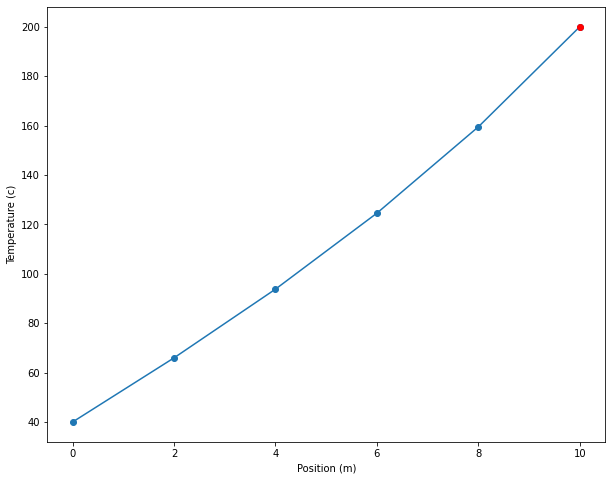

In [14]:
n = 5
dx = (10-0) / n

h = 0.01
ta = 20

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = 1
for i in range(1, n):
    A[i, i-1] = -1
    A[i, i] = 2 + h*dx**2
    A[i, i+1] = -1

#print(A)

# Get b
b = np.zeros(n+1)
b[0] = 40
b[1:-1] = ta*h*dx**2
b[-1] = 200
#print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

x = np.linspace(0, 10, n+1)

plt.figure(figsize=(10,8))
plt.plot(x, y, marker='o')
plt.plot(10, 200, 'ro')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (c)')
plt.show()

#### Exemplo:
Usando o método de diferenças finitas para resolver o seguinte problema de valor de contorno linear

$$y'' = -4y + 4x$$

com as condições de contorno como $y(0)=0$ e $y'(\pi/2)=0$. A solução exata do problema é $y=x+\frac{\sin(2x)}{2}$, plote os erros contra os $n$ pontos da grade ($n$ de 3 a 100) para o ponto limite $y(\pi/2)$.

**resposta:**

Usando as derivadas aproximadas por diferenças finitas, temos

\begin{align*}
y_0 &= 0\\
y_{i-1} - 2y_i + y_{i+1} - h^2(-4y_i + 4x_i) &= 0 , \;\; i=1,2,\dots, n-1\\
2 y_{n-1} - 2y_n - h^2(-4y_n + 4x_n) &=0
\end{align*}

A última equação é derivada do fato de que $\frac{y_{n+1} - y_{n-1}}{2h}=0$ (a condição de contorno $y'(\pi/2)=0$). Portanto, $y_{n+1}=y_{n−1}$.

Primeiro vamos testar a resolução analitica usando o `sympy` 

In [42]:
x= sp.symbols('x')
y = sp.Function('y')

eq = sp.Eq(y(x).diff(x,2), -4*y(x)+4*x)
sp.dsolve(eq, y(x), ics={y(x).subs(x,0):0, y(x).diff(x).subs(x,sp.pi/2):0})

Eq(y(x), x + sin(2*x)/2)

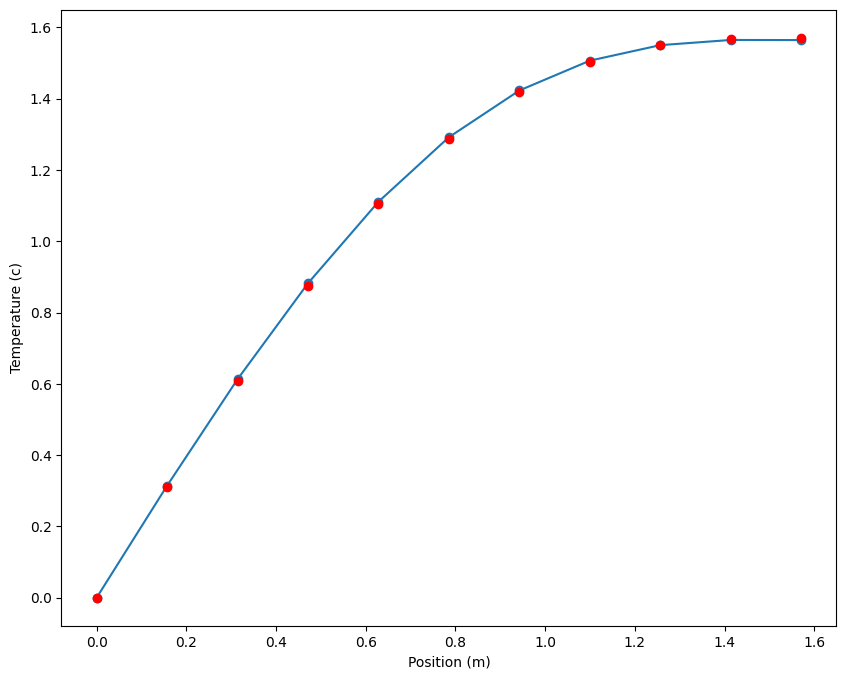

In [7]:
n = 10
dx = (np.pi/2-0) / n

# Get A
A = np.zeros((n+1, n+1))
A[0, 0] = 1
A[n, n] = -2 *(1-2*dx**2)
A[n, n-1] = 2
for i in range(1, n):
    A[i, i-1] = 1
    A[i, i] = -2 *(1-2*dx**2)
    A[i, i+1] = 1

#print(A)

# Get b
b = np.zeros(n+1)
b[0] = 0
for i in range(1, n+1):
    b[i] = 4*dx**2 *(i*dx)

#print(b)

# solve the linear equations
y = np.linalg.solve(A, b)

x = np.linspace(0, np.pi/2, n+1)
f = lambda x: x + np.sin(2*x)/2

plt.figure(figsize=(10,8))
plt.plot(x, y, marker='o')
plt.plot(x, f(x), 'ro')
plt.xlabel('Position (m)')
plt.ylabel('Temperature (c)')
plt.show()

### Problemas de Contorno para Equações Diferenciais Ordinárias

A figura abaixo mostra um sistema físico que pode servir como contexto para o
exame desse tipo de problema.

<p align="center">
<img src="./images/9-eigen.png" width=300 height=300 />
</p>


A curvatura de uma coluna delgada sujeita a uma carga axial P pode ser modelada por

\begin{align*}
\frac{d^2y}{dx^2} = \frac{M}{EI}
\end{align*}

onde $\frac{d^2y}{dx^2}$ especifica a curvatura, $M$ é o momento fletor, $E$ é o modo de elasticidade e $I$ é o momento de inércia da secção transversal em torno de seu eixo neutro. Considerando o corpo livre na figura, é claro que o momento fletor em $x$ é $M = −Py$.
Substituindo esse valor na equação acima, temos

\begin{align*}
\frac{d^2y}{dx^2} = p^2 y
\end{align*}

onde

\begin{align*}
p^2 = \frac{P}{EI}
\end{align*}

Para o sistema na figura, sujeito às condições de contorno

\begin{align*}
y(0) &= 0\\
y(L) &= 0
\end{align*}

a solução geral da equação é

$$
y = A \sin(px) + B \cos(px)
$$

onde $A$ e $B$ são constantes arbitrárias que devem ser calculadas por meio das condições de
contorno. De acordo com a primeira condição

$$
0 = A \sin(0) + B \cos(0)
$$

Portanto, concluímos que $B = 0$.

De acordo com a segunda condição

$$
0 = A \sin(pL) + B \cos(pL)
$$

Mas, como $B = 0, A \sin ( pL) = 0$. Como $A = 0$ representaria uma solução trivial, concluímos que $\sin ( pL) = 0$. Para essa igualdade ser válida,

$$
pL = n\pi \qquad \text{ para } n= 1, 2, 3, \cdots
$$

Logo, existe um número infinito de valores que satisfazem as condições de contorno. A
equação acima pode ser resolvida por

$$
p = \frac{n\pi}{L} \qquad \text{ para } n= 1, 2, 3, \cdots
$$
que são os autovalores para a coluna.

<p align="center">
<img src="./images/9-eigen2.png" width=350 height=500 />
</p>


A figura acima, que mostra a solução para os primeiros quatro autovalores, pode
fornecer uma percepção do significado físico dos resultados. Cada autovalor corresponde
a uma maneira pela qual a coluna se deforma. Combinando as equações , obtemos

$$
P = \frac{n^2 \pi^2 E I}{L^2} \qquad \text{ para } n= 1, 2, 3, \cdots
$$

Isso pode ser pensado como *cargas de deformação*, pois elas representam o nível no qual
a coluna se move em cada configuração sucessiva de deformação. No sentido prático, em
geral, é o primeiro valor que tem interesse, porque a falha geralmente acontecerá quando
a coluna se deformar inicialmente. Assim, uma carga crítica pode ser definida como

$$
P = \frac{\pi^2 E I}{L^2}
$$

a qual é formalmente conhecida como *fórmula de Euler*.

##### Exemplo:
Uma coluna de madeira sob carga axial tem as seguintes características: $E = 10 \times 10^9 Pa, I = 1.25 \times 10^{−5} m^4, \text{ e } L = 3 m$. Determine os primeiros oito autovalores e as correspondentes cargas de deformação.

**Resposta**

<p align="center">
<img src="./images/9-eigen3.png" width=350 height=300 />
</p>


Embora as soluções analíticas do tipo que se obteve anteriormente sejam úteis, elas,
em geral, são difíceis ou impossíveis de obter. Isso normalmente é verdade quando se
trata de sistemas complicados ou daqueles com propriedades heterogêneas. Em tais casos,
os métodos numéricos do tipo descrito a seguir são a única alternativa prática.

#### Método Polinomial

A equação 

\begin{align*}
\frac{d^2y}{dx^2} = p^2 y
\end{align*}

pode ser resolvida numericamente substituindo a segunda derivada por uma aproximação por diferença finita dividida centrada. Dessa forma,

$$
\frac{y_{i+1} - 2y_i + y_{i-1}}{h^2} + p^2 y_i = 0
$$

o que pode ser expresso por

$$
y_{i-1} - (2- h^2p^2)y_i + y_{i+1} = 0
$$

Escrevendo essa equação para uma série de nós ao longo do eixo da coluna, obtemos um
sistema homogêneo de equações. Por exemplo, se a coluna for dividida em cinco segmentos (isto é, quatro nós interiores), o resultado é

$$
\begin{bmatrix}
(2-h^2p^2) & -1 & 0 & 0 \\
-1 & (2-h^2p^2) & -1 & 0 \\
0 & -1 & (2-h^2p^2) & -1 \\
0 & 0 & -1 & (2-h^2p^2)
\end{bmatrix} 
\begin{bmatrix}
y_1\\
y_2\\
y_3\\
y_4
\end{bmatrix}
=0
$$

A expansão do determinante do sistema fornece um polinômio, cujas raízes são os autova-
lores. Essa abordagem, chamada *método polinomial*, é adotada no seguinte exemplo.

##### Example: 

Use o método polinomial para determinar os autovalores para a coluna com carga axial do Exemplo anterior, usando (a) um, (b) dois, (c) três e (d) quatro
nós interiores.

**Resposta:**


* (a) Escrevendo a equação discritizada para um nó interior, obtemos $(h = 3/2)$

    $$
    -(2-2.252p^2)y_1 = 0
    $$

    Logo, nesse caso simples, o autovalor é analisado igualando-se o determinante a zero

    $$
    2-2.252p^2 = 0
    $$

    e resolvendo por $p = \pm 0.9428$, o que é cerca de $10\%$ menor que o valor exato de
    $1.0472$ obtido no Exemplo anterior

* (b) Para dois nós interiores $(h = 3/3)$

    $$
    \begin{bmatrix}
    (2-p^2) & -1\\
    -1 & (2-p^2)
    \end{bmatrix}
    \begin{bmatrix}
    y_1\\
    y_2
    \end{bmatrix}
    =0
    $$

    A expansão do determinante fornece

    $$(2 − p^2 )^2 − 1 = 0$$

    que pode ser resolvido por $p = \pm 1$ e $\pm 1.73205$. Logo, o primeiro autovalor é agora
    baixo por aproximadamente $4.5\%$ e é obtido um segundo autovalor que é baixo por cerca de $17\%$.

* (c) Para três pontos interiores $(h = 3/4)$

    $$
    \begin{bmatrix}
    (2-0.5625p^2) & -1 & 0\\
    -1 & (2-0.5625p^2) & -1\\
    0 & -1 & (2-0.5625p^2)\\
    \end{bmatrix}
    \begin{bmatrix}
    y_1\\
    y_2\\
    y_3
    \end{bmatrix}
    =0
    $$

    O determinante pode ser igualado a zero e expandido para fornecer

    $$
    (2 − 0.5625 p^2 )^3 − 2(2 − 0.5625 p^2 ) = 0
    $$

    Para essa equação ser válida, $2 − 0.5625p^2 = 0$ ou $2 − 0.5625p^2 = \sqrt 2$
    podemos determinar que os três primeiros autovalores são

    + $p = \pm 1.0205  \qquad |\alpha_t| = 2.5\%$
    + $p = \pm 1.8856  \qquad |\alpha_t| = 10\%$
    + $p = \pm 2.4637  \qquad |\alpha_t| = 22\%$

* (d) Para quatro pontos interiores $(h = 3/5)$, o resultado é $2 − 0.36p^2$ na diagonal Igualando-se o determinante a zero e expandindo, obtemos 

    $$
    (2 − 0.36 p^2 )^4 − 3(2 − 0.36 p^2 )^2 + 1 = 0
    $$

    que pode ser resolvido para determinar os primeiros quatro autovalores

    + $p = \pm 1.0301  \qquad |\alpha_t| = 1.6\%$
    + $p = \pm 1.9593  \qquad |\alpha_t| = 6.5\%$
    + $p = \pm 2.6967  \qquad |\alpha_t| = 14\%$
    + $p = \pm 3.1702  \qquad |\alpha_t| = 24\%$

#### Metodo da Potencia

##### Exemplo:
Use o método da potência para determinar o maior autovalor para a parte (c) do Exemplo anterior.

**Resposta**

Primeiro precisamos de escrever o sistema no formato

$$
[A]\{X\} = \lambda \{X\}
$$

Para fazer isso temos que reescrever a equação diferencial na forma

$$
-y_{i+1} + 2y_i - y_{i-1} = h^2 p^2 y_i
$$

Agora a parte (c) pode ser escrito como

\begin{align*}
-y_2 + 2y_1 + 0 &= (0.75)^2 p^2 y_1\\
-y_3 + 2y_2 - y_1 &= (0.75)^2 p^2 y_2\\
0 + 2y_3 - y_2 &= (0.75)^2 p^2 y_3
\end{align*}

Ou seja

$$
\begin{bmatrix}
3.556 & -1.778 & 0 \\
-1.778 & 3.556 & -1.778\\
0 & -1.788 & 3.556 
\end{bmatrix}
\begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
= p^2 
\begin{bmatrix}
y_1\\
y_2\\
y_3
\end{bmatrix}
$$

Agora podemos usar a função que desenvolvemos anteriormente para achar o maior auto valor do sistema

In [2]:
A = np.array([[3.556, -1.778, 0], [-1.778, 3.556, -1.778], [0, -1.778, 3.556]])
x0 = np.array([1,1,1])
cn.power_method(A, x0)

(6.070471065989848, array([ 1.       , -1.4142135,  1.       ]))

Para verificar o resultado

In [3]:
A.dot(np.array([ 1.       , -1.4142135,  1.       ]))

array([ 6.0704716 , -8.58494321,  6.0704716 ])

Assim, o fator normalizador está convergindo para o valor $6.070 (= (2.46372)^2)$ obtido
na parte (c) do Exemplo.

Observe que existem alguns casos nos quais o método da potência convergirá para
o segundo maior autovalor em vez do maior. James, Smith e Wolford (1985) forneceram uma ilustração de tal caso. Outros casos especiais são discutidos em Fadeev e
Fadeeva (1963).

##### Example:
Utilize o método da potência para determinar o menor autovalor para a parte (c) do Exemplo

**resposta**

In [4]:
A_inv = np.linalg.inv(A)

cn.power_method(A_inv, x0)

(0.9601281457464876, array([0.70710696, 1.        , 0.70710696]))

Dessa maneira, depois de apenas três iterações, o resultado está convergindo para
o valor $0.9602$, que é o inverso do menor autovalor, $1,0205(= \sqrt{1/0.9602})$, obtido no
Exemplo.


##### Exercicio:

Use o metodo QR para achar todos os autovalores do sistema da parte (c) do Exemplo.

# Um Estudo de Caso: Modelos Predador-Presa e Caos

**Fundamentos** 

Os engenheiros ambientais tratam diversos problemas envolvendo sistemas de equações diferenciais ordinárias não-lineares. Nesta seção, nos concentraremos em duas dessas aplicações. A primeira está relacionada com os assim chamados modelos predador-presa que são usados para estudar a variação cíclica de nutrientes e poluentes tóxicos na cadeia alimentar aquática e nos sistemas de tratamento biológicos. A segunda são equações que derivam da dinâmica dos fluidos e que são utilizadas para simular a atmosfera. Além de sua aplicação óbvia à previsão do tempo, tais equações também têm sido usadas para estudar a poluição do ar e a variação global do clima.

Os *modelos predador-presa* foram desenvolvidos independentemente no começo do século XX pelo matemático italiano Vito Volterra e pelo biólogo norte-americano Alfred J. Lotka. Essas equações são, em geral, denominadas equações de Lotka-Volterra. O exemplo mais simples é o seguinte par de EDOs:

\begin{align*}
\frac{dx}{dt} &= ax - bxy\\
\frac{dy}{dt} &= -cy + dxy\\
\end{align*}

onde $x$ e $y$ são os números de presas e predadores, respectivamente, a é a taxa de crescimento da presa, $c$ é a taxa de morte do predador e $b$ e $d$ são taxas caracterizando o efeito da interação predador-presa na morte da presa e no crescimento do predador, respectivamente. Os termos multiplicativos (isto é, aqueles envolvendo $xy$ ) são os que tornam tais
equações não-lineares.

Um exemplo de modelo simples baseado na dinâmica dos fluidos atmosféricos são as equações de Lorenz, desenvolvidas pelo meteorologista norte-americano Edward Lorenz,

\begin{align*}
\frac{dx}{dt} &= \sigma x + \sigma y\\
\frac{dy}{dt} &= rx - y - xy \\
\frac{dz}{dt} &= -bz + xy
\end{align*}

Lorenz desenvolveu essas equações para relacionar a intensidade de movimento do fluido atmosférico, $x$, as variações de temperatura $y$ e $z$ nas direções horizontal e vertical, respectivamente. Como no modelo predador-presa, vemos que a não-linearidade está localizada em termos multiplicativos simples ($xz$ e $xy$).

Use métodos numéricos para obter soluções para essas equações. Faça gráficos dos seus resultados para visualizar como as variáveis dependentes variam no tempo. Além disso, faça um gráfico das variáveis dependentes uma em função da outra para ver se emergem quaisquer padrões interessantes.

Use os seguintes valores dos parâmetros para a simulação pedador-presa:
$a = 1.2, b = 0.6, c = 0.8 \text{ e } d = 0.3$. Use condições iniciais $x = 2 \text{ e } y = 1$ e integre de $t = 0 \text{ a } 30$ usando um tamanho de passo $h=0.1$. 

E para as equações de Lorenz use os seguintes valores: $\sigma=10, \; b=2666667$ e $r = 28$. A condição inicial para $x=y=z=5$ e integre de $t=0 \text{ a } 20$.

In [4]:
import cn_utils as cn
import numpy as np
import sympy as sp


In [3]:
p = [1, -2, 1]

np.roots(p)

array([1., 1.])

In [5]:
x = sp.symbols('x')

In [11]:
pol = (2 - 0.5625*x**2)**3 - 2*(2 - 0.5625*x**2)

In [12]:
sp.solve(pol)

[-2.46367875336343,
 -1.88561808316413,
 -1.02048915297357,
 1.02048915297357,
 1.88561808316413,
 2.46367875336343]

In [13]:

a = np.array([[0.422,  0.281,  0.141],[ 0.281,  0.562,  0.281], [0.141 , 0.281,  0.422]] )



In [17]:
np.linalg.inv(a)*0.5625

array([[ 1.99823011, -0.99734043, -0.00354925],
       [-0.99734043,  1.99823011, -0.99734043],
       [-0.00354925, -0.99734043,  1.99823011]])